In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.abc import x
import scipy.io as sio
import scipy.interpolate as interpolate

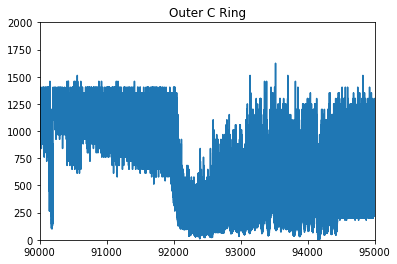

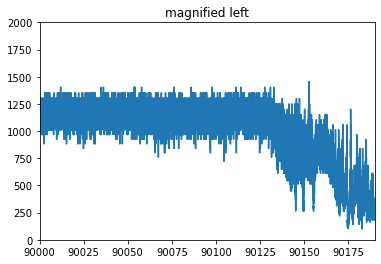

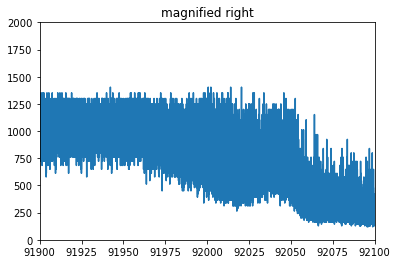

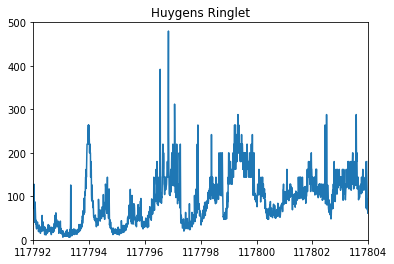

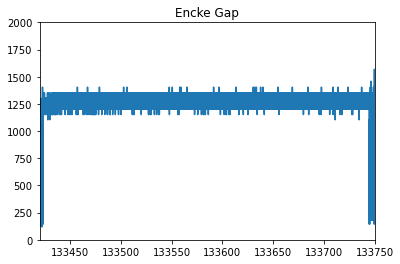

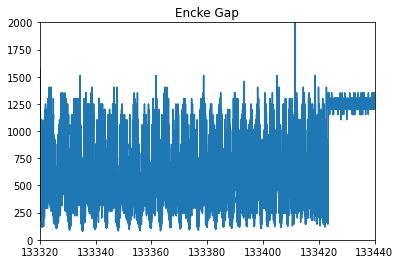

In [2]:
dataA064E = sio.readsav("beta_cen_occs/BetCen064E_data_rad_phi_cpck_070518.sav")
#dataB064E = sio.readsav("beta_cen_occs/BetCenB064E_data_rad_phi_cpck_062121.sav")
#dataA104E = sio.readsav("beta_cen_occs/BetCen104E_data_rad_phi_cpck_070518.sav")
#dataB104E = sio.readsav("beta_cen_occs/BetCenB104E_data_rad_phi_cpck_062221.sav")
#print(dataA104E)
#print("\n")
#print(dataB104E)
plt.plot(dataA064E.radius, dataA064E.data)
plt.xlim(90000, 95000)
plt.ylim(0, 2000)
plt.title("Outer C Ring")
plt.show()
plt.plot(dataA064E.radius, dataA064E.data)
plt.xlim(90000, 90190)
plt.ylim(0, 2000)
plt.title("magnified left")
plt.show()
plt.plot(dataA064E.radius, dataA064E.data)
plt.xlim(91900, 92100)
plt.ylim(0, 2000)
plt.title("magnified right")
plt.show()
plt.plot(dataA064E.radius, dataA064E.data)
plt.xlim(117792, 117804)
plt.ylim(0, 500)
plt.title("Huygens Ringlet")
plt.show()
plt.plot(dataA064E.radius, dataA064E.data)
plt.xlim(133420, 133750)
plt.ylim(0, 2000)
plt.title("Encke Gap")
plt.show()
plt.plot(dataA064E.radius, dataA064E.data)
plt.xlim(133320, 133440)
plt.ylim(0, 2000)
plt.title("Encke Gap")
plt.show()

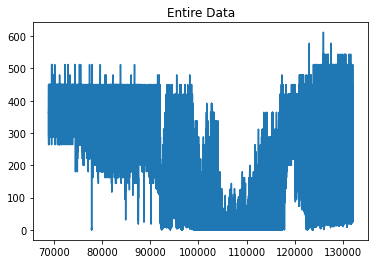

in_edge length: 76


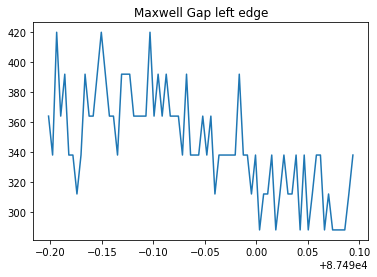

in_edge2 length: 102


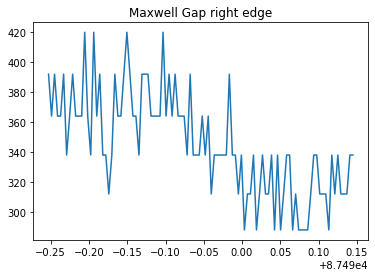

in_edge2 length: 76


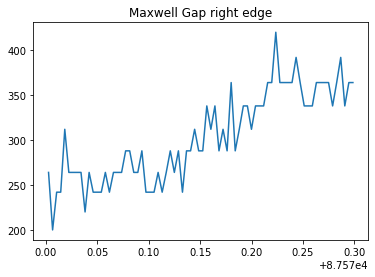

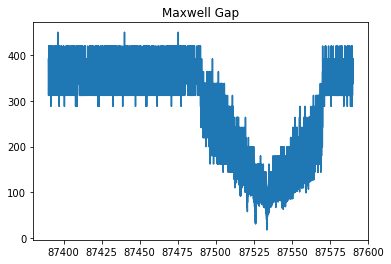

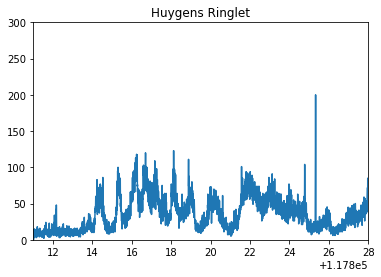

enckeGap: 123


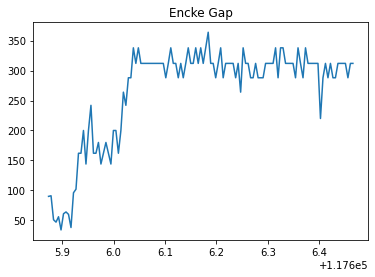

enckeGap: 818546


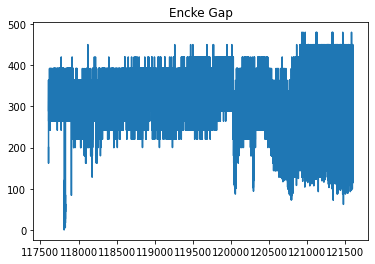

In [3]:
dataA104E = sio.readsav("beta_cen_occs/BetCen104E_data_rad_phi_cpck_070518.sav")

plt.plot(dataA104E.radius, dataA104E.data)
plt.title("Entire Data")
plt.show()

in_edge = np.where(abs(dataA104E.radius - 87489.945) <= 0.15)
print("in_edge length: %d" % len(dataA104E.data[in_edge]))

plt.plot(dataA104E.radius[in_edge], dataA104E.data[in_edge])
#plt.xlim(117795, 117827)
#plt.ylim(0, 400)
plt.title("Maxwell Gap left edge")
#print("BetCen rev 104 egress")
plt.show()

in_edge2 = np.where(abs(dataA104E.radius - 87489.945) <= 0.2)
print("in_edge2 length: %d" % len(dataA104E.data[in_edge2]))

plt.plot(dataA104E.radius[in_edge2], dataA104E.data[in_edge2])
#plt.xlim(117795, 117827)
#plt.ylim(0, 400)
plt.title("Maxwell Gap right edge")
#print("BetCen rev 104 egress")
plt.show()

in_edge2 = np.where(abs(dataA104E.radius - 87570.15) <= 0.15)
print("in_edge2 length: %d" % len(dataA104E.data[in_edge2]))

plt.plot(dataA104E.radius[in_edge2], dataA104E.data[in_edge2])
#plt.xlim(117795, 117827)
#plt.ylim(0, 400)
plt.title("Maxwell Gap right edge")
#print("BetCen rev 104 egress")
plt.show()

maxwellGap = np.where(abs(dataA104E.radius - 87490.1) <= 100)

plt.plot(dataA104E.radius[maxwellGap], dataA104E.data[maxwellGap])
#plt.ylim(150, 250)
plt.title("Maxwell Gap")
#print("BetCen rev 104 egress")
plt.show()

plt.plot(dataA104E.radius, dataA104E.data)
plt.xlim(117811, 117828)
plt.ylim(0, 300)
plt.title("Huygens Ringlet")
plt.show()

enckeGap = np.where(abs(dataA104E.radius - 117606.17) <= 0.3)
print("enckeGap: %d" % len(dataA104E.data[enckeGap]))

plt.plot(dataA104E.radius[enckeGap], dataA104E.data[enckeGap])
#plt.xlim(116830, 119999)
#plt.ylim(0, 2000)
plt.title("Encke Gap")
plt.show()

enckeGap = np.where(abs(dataA104E.radius - 119606) <= 2000)
print("enckeGap: %d" % len(dataA104E.data[enckeGap]))

plt.plot(dataA104E.radius[enckeGap], dataA104E.data[enckeGap])
#plt.xlim(116830, 119999)
#plt.ylim(0, 2000)
plt.title("Encke Gap")
plt.show()

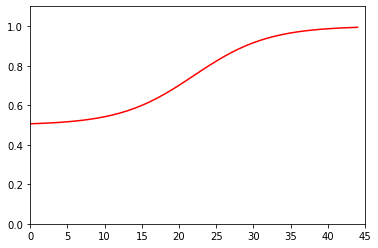

48008


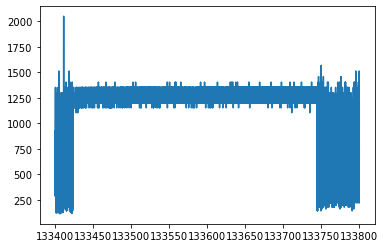

72


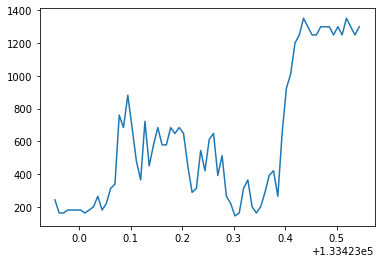

72


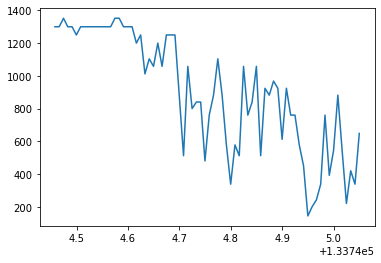

9493


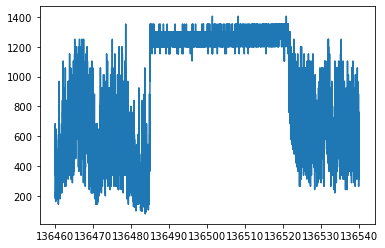

71


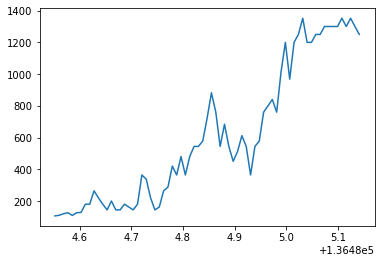

71


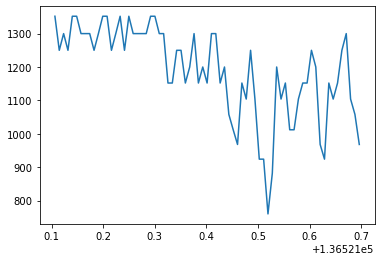

In [9]:
class ModelTransparencyFourier:
    
    # low amplitude sine waves oscillating between 30% to 60% transparency with the possiblity of lag.
    # Initializing pointInstances, the x-axis for the transparency plot.
    def constructPointInstancesAndTransparencyArraysFourier(self):
        self.pointInstances = []
        self.transparency = []
        for i in range(0, self.numPoints):
            self.pointInstances = np.append(self.pointInstances, [i])
            if (self.transparencyFourier(i * self.periocityFactor) < 0):
                self.transparency = np.append(self.transparency, [0])
            elif self.transparencyFourier(i * self.periocityFactor) > 1:
                self.transparency = np.append(self.transparency, [1])
            else:
                self.transparency = np.append(self.transparency, [self.transparencyFourier(i * self.periocityFactor)])
 

    def __init__(self, brightness, radialLag, numPoints, periocityFactor,
                 function, scale, scalex, shift, shiftx, order, startPeriod, endPeriod):
        # Indicates the average number of photons that you would get from each star in the absence of
        # any intervening ring material.
        self.brightness = brightness
        # The radial lag between the two stars. An integer number of points that correspond to the n radial points for the ring.
        # Positive values indicate starB lags behind starA. Negative values indicate starA lags behind starB.
        self.radialLag = radialLag
        # Number of bins.
        self.numPoints = numPoints
        # Defines the periocity factor (wave number) for the sine wave.
        self.periocityFactor = periocityFactor
        self.shiftValue = shift
        self.transparencyFourier = fourier_series(function, (x, startPeriod, endPeriod))
        self.transparencyFourier = self.transparencyFourier.scale(scale).scalex(scalex).shift(shift).shiftx(shiftx).truncate(n = order)
        #print(self.transparencyFourier)
        self.transparencyFourier = lambdify(x, self.transparencyFourier)
        self.constructPointInstancesAndTransparencyArraysFourier()
      
        
class ModelTransparencyStep:
    
    def constructPointInstancesAndTransparencyArraysStep(self):
        self.pointInstances = []
        self.stepsArray = []
        self.transparency = []
        
        interval = (self.maxTransparency - self.minTransparency) / (self.numSteps - 1)
        #print("interval = %f" % interval)

        self.stepsArray = np.append(self.stepsArray, [self.minTransparency])
        
        for i in range(0, self.numSteps - 1):
            tempTransparency = self.stepsArray[i] + interval
            self.stepsArray = np.append(self.stepsArray, [tempTransparency])

        numElementsAtStep = int(self.numPoints / len(self.stepsArray))
        
        index = 0
        while (index < self.numSteps):
            for i in range(0, numElementsAtStep):
                self.transparency = np.append(self.transparency, [self.stepsArray[index]])
            index = index + 1                                                     
        remainingElements = self.numPoints - (len(self.stepsArray) * floor(self.numPoints / len(self.stepsArray)))
        for i in range(0, remainingElements):
            self.transparency = np.append(self.transparency, [self.stepsArray[-1]])
        for i in range(0, self.numPoints):
            self.pointInstances = np.append(self.pointInstances, [i])                                                                                                              
        #print(self.stepsArray)
        
        #New Parameter, slopeLength
        if self.slopeLength != 0:
            index = 0
            while (index < self.numPoints - 1):
                if (self.transparency[index] != self.transparency[index + 1]):
                    if ((self.slopeLength % 2) == 1):
                        indexOfInnerBound = index - ceiling(self.slopeLength / 2)
                        #print("IndexOfInnerBound = %d" % indexOfInnerBound)
                        indexOfOuterBound = index + ceiling(self.slopeLength / 2)
                        #print("IndexOfOuterBound = %d" % indexOfOuterBound)
                        numerator = self.transparency[indexOfInnerBound] - self.transparency[indexOfOuterBound]
                        denominator = indexOfInnerBound - (indexOfOuterBound)
                        slope = numerator / denominator
                        x1 = indexOfInnerBound
                        y1 = self.transparency[indexOfInnerBound]
                        for i in range((indexOfInnerBound), (indexOfOuterBound)):
                            self.transparency[i] = (slope * (i - x1)) + y1
                        index = index + self.slopeLength
                    if (self.slopeLength % 2 == 0):
                        indexOfInnerBound = index - floor(self.slopeLength / 2)
                        #print("IndexOfInnerBound = %d" % indexOfInnerBound)
                        indexOfOuterBound = index + floor(self.slopeLength / 2) + 1
                        #print("IndexOfOuterBound = %d" % indexOfOuterBound)
                        #NEW ADDITION:
                        if (indexOfOuterBound >= self.numPoints):
                            break
                        numerator = self.transparency[indexOfInnerBound] - self.transparency[indexOfOuterBound]
                        denominator = indexOfInnerBound - (indexOfOuterBound)
                        slope = numerator / denominator
                        x1 = indexOfInnerBound
                        y1 = self.transparency[indexOfInnerBound]
                        for i in range((indexOfInnerBound), (indexOfOuterBound)):
                            self.transparency[i] = (slope * (i - x1)) + y1
                        index = index + self.slopeLength
                index = index + 1
            
        
    def recognizeRadialLag(self):
        if (self.radialLag > 0):
            transparencyCopy = self.transparency.copy()
            for i in range(0, self.numPoints):
                if ((i + self.radialLag) < self.numPoints):
                    self.transparency[i] = transparencyCopy[i + self.radialLag];
                else:
                    self.transparency[i] = transparencyCopy[-1];
        elif (self.radialLag < 0):
            transparencyCopy = self.transparency.copy()
            for i in range(0, self.numPoints):
                if ((i + self.radialLag) > 0):
                    self.transparency[i] = transparencyCopy[i + self.radialLag];
                else:
                    self.transparency[i] = transparencyCopy[0];
                

    def __init__(self, brightness, radialLag, numPoints, minTransparency, maxTransparency, slopeLength, numSteps):
        self.brightness = brightness
        self.radialLag = radialLag
        self.numPoints = numPoints
        self.minTransparency = minTransparency
        self.maxTransparency = maxTransparency
        self.slopeLength = slopeLength
        self.numSteps = numSteps
        self.constructPointInstancesAndTransparencyArraysStep()
        self.recognizeRadialLag()

class ModelTransparencySigmoid:
    
    def constructPointInstancesAndTransparencyArraysStep(self):
        self.pointInstances = []
        self.transparency = []
        
        for i in range(0, self.numPoints):
            sigmoidResult = (self.maxTransparency - self.minTransparency)/(1 + np.exp((float)((-self.slopeFactor) * (i - (floor(self.numPoints / 2) - self.radialLag))))) + self.minTransparency
            self.transparency = np.append(self.transparency, [sigmoidResult])
            self.pointInstances = np.append(self.pointInstances, [i])         
        

                

    def __init__(self, brightness, radialLag, numPoints, minTransparency, maxTransparency, slopeFactor):
        self.brightness = brightness
        self.radialLag = radialLag
        self.numPoints = numPoints
        self.minTransparency = minTransparency
        self.maxTransparency = maxTransparency
        self.slopeFactor = slopeFactor
        self.constructPointInstancesAndTransparencyArraysStep()
        

# Poisson Distribution is a Discrete Distribution...
# ...estimating how many times an event can happen in a specified time.
# "np.random.poisson(lambda, size) has two parameters:
# lamda - rate or known number of occurences
# size - The shape of the returned array"

# Initializes values for the outputVector, which is an array that contains the summed random values from the corresponding
# elements of the transparency arrays for stars A and B.
def output(starA, starB):
    outputVector = []
    for i in range (0, starA.numPoints):
        randomNumberA = np.random.poisson(round(starA.brightness * starA.transparency[i]))
        #randomNumberB = np.random.poisson(round(starB.brightness * starB.transparency[i - starB.radialLag]))
        randomNumberB = np.random.poisson(round(starB.brightness * starB.transparency[i]))
        randomNumberSum = randomNumberA + randomNumberB
        outputVector = np.append(outputVector, [randomNumberSum])  
    return outputVector

def plotOutput500(starA, starB):
    outputVector = output(starA, starB)
    
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(starA.pointInstances, starA.transparency, starB.pointInstances, starB.transparency, 'r-')
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title("Transparencies A and B")
    plt.xlim(0, starA.numPoints)
    plt.ylim(0,1)

    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, starA.transparency, starB.pointInstances, starB.transparency, 'r-')
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title("Transparencies A and B (Magnified from 0 to 500 Units)")
    plt.xlim(0, 500)
    plt.ylim(0,1)
    plt.show()

    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(starA.pointInstances, outputVector, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Output Vector")

    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, outputVector, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Output Vector (Magnified from 0 to 500 Units)")
    plt.xlim(0, 500)
    plt.show()

def plotOutput1000(starA, starB):
    outputVector = output(starA, starB)
    
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(starA.pointInstances, starA.transparency, starB.pointInstances, starB.transparency, 'r-')
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title("Transparencies A and B")
    plt.xlim(0, starA.numPoints)
    plt.ylim(0,1)

    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, starA.transparency, starB.pointInstances, starB.transparency, 'r-')
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title("Transparencies A and B (Magnified from 0 to 1000 Units)")
    plt.xlim(0, 1000)
    plt.ylim(0,1)
    plt.show()

    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(starA.pointInstances, outputVector, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Output Vector")

    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, outputVector, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Output Vector (Magnified from 0 to 1000 Units)")
    plt.xlim(0, 1000)
    plt.show()

def spike(star, unitsFromCenter, verticalShiftOfSpikeCenter, radiusOfSpike):
    indexOfSpikeCenter = round(len(star.transparency) / 2) + unitsFromCenter
    
    #print('Previously: ({}, {:.3f})'.format(indexOfSpikeCenter, star.transparency[indexOfSpikeCenter]))
    star.transparency[indexOfSpikeCenter] = star.transparency[indexOfSpikeCenter] + verticalShiftOfSpikeCenter
    #print('Now: ({}, {:.3f})'.format(indexOfSpikeCenter, star.transparency[indexOfSpikeCenter]))
    
    
    slopeRight = ((star.transparency[indexOfSpikeCenter] - star.transparency[indexOfSpikeCenter + radiusOfSpike]) /
    (indexOfSpikeCenter - (indexOfSpikeCenter + radiusOfSpike)))
    
    slopeLeft = ((star.transparency[indexOfSpikeCenter] - star.transparency[indexOfSpikeCenter - radiusOfSpike]) /
    (indexOfSpikeCenter - (indexOfSpikeCenter - radiusOfSpike)))
    
    for i in range(1, radiusOfSpike):
        #point-slope form
        #print('Previously: ({}, {:.3f})'.format(indexOfSpikeCenter, star.transparency[indexOfSpikeCenter + i]))
        star.transparency[indexOfSpikeCenter + i] = slopeRight * ((indexOfSpikeCenter + i) - indexOfSpikeCenter) + star.transparency[indexOfSpikeCenter]
        #print('Now: ({}, {:.3f})'.format(indexOfSpikeCenter, star.transparency[indexOfSpikeCenter + i]))
        
        #print('Previously: ({}, {:.3f})'.format(indexOfSpikeCenter, star.transparency[indexOfSpikeCenter - i]))
        star.transparency[indexOfSpikeCenter - i] = slopeLeft * ((indexOfSpikeCenter - i) - indexOfSpikeCenter) + star.transparency[indexOfSpikeCenter]
        #print('Now: ({}, {:.3f})'.format(indexOfSpikeCenter, star.transparency[indexOfSpikeCenter - i]))
    
    
    
def chiSquared(data, radiusSubset, starA, starB):
    numOutputVectors = 1000
    outputVectorArray = [[] for _ in range(numOutputVectors)]
    outputVectorMeanArray = []
    outputVectorStdevArray = []
    outputVectorStduncArray = []
   # outputVectorArray = np.append(outputVectorArray, [])
    for i in range(0, numOutputVectors):
        outputVector = output(starA, starB)
        outputVectorArray[i] = np.append(outputVectorArray[i], [outputVector])
        outputVectorMeanArray = np.append(outputVectorMeanArray, [np.mean(outputVector)])
        # 2 degrees of freedom for 2 values free to vary.
        outputVectorStdevArray = np.append(outputVectorStdevArray, [np.std(outputVector, None, None, None, len(data.data[radiusSubset])/4, False)])
        outputVectorStduncArray = np.append(outputVectorStduncArray, [(outputVectorStdevArray[i] / np.sqrt(len(data.data[radiusSubset])))])
    
    #print(outputVectorStdevArray)  
    #print(outputVectorStduncArray)    
    
    chiSquared = []
    numParameters = 4
    denominator = np.mean(data.data[radiusSubset])
    for i in range(0, numOutputVectors):
        summation = 0
        for j in range(0, len(data.data[radiusSubset])):
            #numerator = outputVectorArray[i][j] - data.data[radiusSubset][j]
            #denominator = outputVectorStduncArray[i]
            #summation = summation + ((numerator / denominator) ** 2)
            numerator = (outputVectorArray[i][j] - data.data[radiusSubset][j]) ** 2
            summation = summation + (numerator / denominator)
        #chiSquaredForOneOutputVector = (1 /(len(data.data[radiusSubset]))) * summation
        #chiSquaredForOneOutputVector = 1/2 * summation
        chiSquaredForOneOutputVector = (1 /(len(data.data[radiusSubset]) - numParameters)) * summation
        chiSquared = np.append(chiSquared, [chiSquaredForOneOutputVector])
        chiSquaredMean = np.mean(chiSquared)
    
    return chiSquaredMean

    
def plotDataAndOutputStep(data, radiusSubset, dataPlotTitle, starA, starB):
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(data.radius[radiusSubset], data.data[radiusSubset], 'k')
    plt.ylim(min(data.data[radiusSubset]) - 25, max(data.data[radiusSubset]) + 25)
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(dataPlotTitle)
    
    totalRadialLag = abs(starA.radialLag - starB.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {}) (Radial Lag: {} Units)'.format(
                             starA.brightness, starB.brightness, totalRadialLag)
    if (starA.minTransparency != 1):
        shift = abs(starA.minTransparency - starB.minTransparency)
    else:
        shift = abs(starA.maxTransparency - starB.maxTransparency)
        
    transparencyALabel = 'Transparency A (Brightness: {}) (Slope Lengths: {})'.format(starA.brightness, starA.slopeLength)
    
    if (shift == 0):
        transparencyBLabel = 'Transparency B (Brightness: {})'.format(starB.brightness)
    else:
        transparencyBLabel = 'Transparency B (Brightness: {}) (Shift: {:.3f})'.format(starB.brightness, shift)
    
    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, starA.transparency, label = transparencyALabel)
    plt.plot(starB.pointInstances, starB.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend()
    plt.show()

    outputVectorA = output(starA, starB)
    outputVectorB = output(starA, starB)

    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(starA.pointInstances, outputVectorA, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Output Vector")
    plt.ylim(min(data.data[radiusSubset]) - 25, max(data.data[radiusSubset]) + 25)

    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, outputVectorB, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Another Output Vector")
    plt.ylim(min(data.data[radiusSubset]) - 25, max(data.data[radiusSubset]) + 25)
    plt.show()
    
    #print("χ2: %f" % chiSquared(data, radiusSubset, starA, starB))
    #print("")
    
    
def plotDataAndOutputFourier(data, radiusSubset, dataPlotTitle, starA, starB):
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(data.radius[radiusSubset], data.data[radiusSubset], 'k')
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(dataPlotTitle)
    
    totalRadialLag = abs(starA.radialLag - starB.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {}) (Radial Lag: {} Units)'.format(
                             starA.brightness, starB.brightness, totalRadialLag)
    
    shift = abs(starA.shiftValue - starB.shiftValue)
    transparencyALabel = 'Transparency A (Brightness: {})'.format(starA.brightness)
    
    if (shift == 0):
        transparencyBLabel = 'Transparency B (Brightness: {})'.format(starB.brightness)
    else:
        transparencyBLabel = 'Transparency B (Brightness: {}) (Shift: {})'.format(starB.brightness, shift)
    
    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, starA.transparency, label = transparencyALabel)
    plt.plot(starB.pointInstances, starB.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.05)
    plt.legend()
    plt.show()

    outputVectorA = output(starA, starB)
    outputVectorB = output(starA, starB)

    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(starA.pointInstances, outputVectorA, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Output Vector")

    plt.subplot(1, 2, 2)
    plt.plot(starA.pointInstances, outputVectorB, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Another Output Vector")
    plt.show()
    
    print("χ2: %f" % chiSquared(data, radiusSubset, starA, starB))
    print("")

    
    
def plotEdgesStep(data, innerEdgePlotTitle, innerEdgeRadius, starA1, starB1, outerEdgePlotTitle, outerEdgeRadius, starA2, starB2):
    
    # try bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0 in plt.legend()
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(data.radius[innerEdgeRadius], data.data[innerEdgeRadius], 'k')
    plt.ylim(min(data.data[innerEdgeRadius]) - 25, max(data.data[innerEdgeRadius]) + 25)
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(innerEdgePlotTitle)
    
    outputVectorA = output(starA1, starB1)
    
    plt.subplot(1, 3, 2)
    plt.plot(starA1.pointInstances, outputVectorA, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Inner Edge Output Vector")
    plt.ylim(min(data.data[innerEdgeRadius]) - 25, max(data.data[innerEdgeRadius]) + 25)
    
    totalRadialLag = abs(starA1.radialLag - starB1.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {}) (Radial Lag: {} Units)'.format(
                             starA1.brightness, starB1.brightness, totalRadialLag)
    if (starA1.minTransparency != 1):
        shift = abs(starA1.minTransparency - starB1.minTransparency)
    else:
        shift = abs(starA1.maxTransparency - starB1.maxTransparency)
        
    transparencyALabel = 'Transparency A (Brightness: {}) (Edge Length: {})'.format(starA1.brightness, starA1.slopeLength)
    
    if (shift == 0):
        transparencyBLabel = 'Transparency B (Brightness: {})'.format(starB1.brightness)
    else:
        transparencyBLabel = 'Transparency B (Brightness: {}) (Shift: {:.3f})'.format(starB1.brightness, shift)
    
    plt.subplot(1, 3, 3)
    plt.plot(starA1.pointInstances, starA1.transparency, label = transparencyALabel)
    plt.plot(starB1.pointInstances, starB1.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(data.radius[outerEdgeRadius], data.data[outerEdgeRadius], 'k')
    plt.ylim(min(data.data[outerEdgeRadius]) - 25, max(data.data[outerEdgeRadius]) + 25)
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(outerEdgePlotTitle)
    
    outputVectorB = output(starA2, starB2)
    
    plt.subplot(1, 3, 2)
    plt.plot(starA2.pointInstances, outputVectorB, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Outer Edge Output Vector")
    plt.ylim(min(data.data[outerEdgeRadius]) - 25, max(data.data[outerEdgeRadius]) + 25)

    totalRadialLag = abs(starA2.radialLag - starB2.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {}) (Radial Lag: {} Units)'.format(
                             starA2.brightness, starB2.brightness, totalRadialLag)
    if (starA2.minTransparency != 1):
        shift = abs(starA2.minTransparency - starB2.minTransparency)
    else:
        shift = abs(starA2.maxTransparency - starB2.maxTransparency)
        
    transparencyALabel = 'Transparency A (Brightness: {}) (Edge Length: {})'.format(starA2.brightness, starA2.slopeLength)
    
    if (shift == 0):
        transparencyBLabel = 'Transparency B (Brightness: {})'.format(starB2.brightness)
    else:
        transparencyBLabel = 'Transparency B (Brightness: {}) (Shift: {:.3f})'.format(starB2.brightness, shift)
    
    plt.subplot(1, 3, 3)
    plt.plot(starA2.pointInstances, starA2.transparency, label = transparencyALabel)
    plt.plot(starB2.pointInstances, starB2.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()
    
def plotEdgesStepALT(data, innerEdgePlotTitle, innerEdgeRadius, starA1, starB1, outerEdgePlotTitle, outerEdgeRadius, starA2, starB2):
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(data.radius[innerEdgeRadius], data.data[innerEdgeRadius], 'k')
    plt.ylim(min(data.data[innerEdgeRadius]) - 25, max(data.data[innerEdgeRadius]) + 25)
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(innerEdgePlotTitle)
    
    outputVectorA = output(starA1, starB1)
    
    plt.subplot(1, 3, 2)
    plt.plot(starA1.pointInstances, outputVectorA, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Inner Edge Output Vector")
    plt.ylim(min(data.data[innerEdgeRadius]) - 25, max(data.data[innerEdgeRadius]) + 25)
    
    totalRadialLag = abs(starA1.radialLag - starB1.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {})'.format(
                             starA1.brightness, starB1.brightness)
    
    transparencyALabel = 'Transparency A'.format()
    transparencyBLabel = 'Transparency B'.format()
    
    plt.subplot(1, 3, 3)
    plt.plot(starA1.pointInstances, starA1.transparency, label = transparencyALabel)
    plt.plot(starB1.pointInstances, starB1.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(data.radius[outerEdgeRadius], data.data[outerEdgeRadius], 'k')
    plt.ylim(min(data.data[outerEdgeRadius]) - 25, max(data.data[outerEdgeRadius]) + 25)
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(outerEdgePlotTitle)
    
    outputVectorB = output(starA2, starB2)
    
    plt.subplot(1, 3, 2)
    plt.plot(starA2.pointInstances, outputVectorB, 'g')
    plt.xlabel("Radial Units")
    plt.ylabel("Summed Signal")
    plt.title("Outer Edge Output Vector")
    plt.ylim(min(data.data[outerEdgeRadius]) - 25, max(data.data[outerEdgeRadius]) + 25)

    totalRadialLag = abs(starA2.radialLag - starB2.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {})'.format(
                             starA2.brightness, starB2.brightness)
        
    transparencyALabel = 'Transparency A'.format()
    transparencyBLabel = 'Transparency B'.format()
    
    plt.subplot(1, 3, 3)
    plt.plot(starA2.pointInstances, starA2.transparency, label = transparencyALabel)
    plt.plot(starB2.pointInstances, starB2.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

    
def plotEdgesOverplot(data, innerEdgePlotTitle, innerEdgeRadius, starA1, starB1, outerEdgePlotTitle, outerEdgeRadius, starA2, starB2):
    plt.subplots(figsize=(15, 5))

    outputVectorA = output(starA1, starB1)
    
    plt.subplot(1, 2, 1)
    plt.plot(data.radius[innerEdgeRadius], data.data[innerEdgeRadius], 'k', label = "Data")
    plt.plot(data.radius[innerEdgeRadius], outputVectorA, 'g', label = "Output Vector")
    plt.ylim(min(data.data[innerEdgeRadius]) - 25, max(data.data[innerEdgeRadius]) + 25)
    plt.xlabel("Ring Plane Radius (km)")
    #plt.legend(bbox_to_anchor=(-0.14,0.5), loc="center right", borderaxespad=0)
    plt.legend(bbox_to_anchor=(2.52,0.58), loc="center right", borderaxespad=0)
    plt.ylabel("Photon Counts")
    plt.title(innerEdgePlotTitle)
    
    
    
    
    totalRadialLag = abs(starA1.radialLag - starB1.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {})'.format(
                             starA1.brightness, starB1.brightness)
    
    transparencyALabel = 'Transparency A'.format()
    transparencyBLabel = 'Transparency B'.format()
    
    plt.subplot(1, 2, 2)
    plt.plot(starA1.pointInstances, starA1.transparency, label = transparencyALabel)
    plt.plot(starB1.pointInstances, starB1.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend(bbox_to_anchor=(1.04,0.42), loc="center left", borderaxespad=0)
    plt.show()

    plt.subplots(figsize=(15, 5))

    outputVectorB = output(starA2, starB2)
    
    plt.subplot(1, 2, 1)
    plt.plot(data.radius[outerEdgeRadius], data.data[outerEdgeRadius], 'k', label = "Data")
    plt.plot(data.radius[outerEdgeRadius], outputVectorB, 'g', label = "Output Vector")
    plt.ylim(min(data.data[outerEdgeRadius]) - 25, max(data.data[outerEdgeRadius]) + 25)
    #plt.legend(bbox_to_anchor=(-0.14,0.5), loc="center right", borderaxespad=0)
    plt.legend(bbox_to_anchor=(2.52,0.58), loc="center right", borderaxespad=0)
    plt.xlabel("Ring Plane Radius (km)")
    plt.ylabel("Photon Counts")
    plt.title(outerEdgePlotTitle)
   

    totalRadialLag = abs(starA2.radialLag - starB2.radialLag)
    transparencyPlotTitle = 'Transparencies A (Brightness: {}) and B (Brightness: {})'.format(
                             starA2.brightness, starB2.brightness)
        
    transparencyALabel = 'Transparency A'.format()
    transparencyBLabel = 'Transparency B'.format()
    
    plt.subplot(1, 2, 2)
    plt.plot(starA2.pointInstances, starA2.transparency, label = transparencyALabel)
    plt.plot(starB2.pointInstances, starB2.transparency, 'r-', label = transparencyBLabel)
    plt.xlabel("Radial Units")
    plt.ylabel("Transparency")
    plt.title(transparencyPlotTitle)
    plt.ylim(0,1.13)
    plt.legend(bbox_to_anchor=(1.04,0.42), loc="center left", borderaxespad=0)
    plt.show()
    
    
    
def bruteForceMinimizingChiSquaredPosSlope(data, radiusSubset, plotTitle, starA, starB, starAminTransparencyIncreaseInterval,
                                   starBminTransparencyIncreaseInterval, slopeLengthIncreaseInterval, radialLagIncreaseInterval,
                                           acceptanceThreshold):
    currentChiSquared = chiSquared(data, radiusSubset, starA, starB)
    
    newStarA = ModelTransparencyStep(starA.brightness, starA.radialLag,
                                              len(data.data[radiusSubset]), starA.minTransparency,
                                              starA.maxTransparency, starA.slopeLength, starA.numSteps)
    newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency, starB.slopeLength, starB.numSteps)
    
    #x = floor(len(data.data[radiusSubset])/2)
    #print(x)
      
    badCounter = 0
    
    #Start radialLag loop
    radialLagIncrease = 0
    while radialLagIncrease <= floor(len(data.data[radiusSubset])/2):
        starAminTransparencyIncrease = 0 
        #Start starAmaxTransparency loop
        while starAminTransparencyIncrease <= 1: 
            starBminTransparencyIncrease = 0 
            #Start starBmaxTransparency loop
            while starBminTransparencyIncrease <= 1:
                newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag + radialLagIncrease,
                                              len(data.data[radiusSubset]),starB.minTransparency + starBminTransparencyIncrease,
                                              starB.maxTransparency, starB.slopeLength, starB.numSteps)
                newChiSquared = chiSquared(data, radiusSubset, newStarA, newStarB)
                chiSquaredDifference = abs(currentChiSquared - newChiSquared)
                if currentChiSquared < newChiSquared:
                    if chiSquaredDifference > acceptanceThreshold:
                        print("starBminTransparencyIncrease = %f" % starBminTransparencyIncrease)
                        print("Bad χ2 in B loop: %f" % newChiSquared)
                        badCounter = badCounter + 1
                        break
                    else:
                        print("                              Entered the acceptanceThreshold block")
                        currentChiSquared = newChiSquared
                        preservedStarA = newStarA
                        preservedStarB = newStarB
                        badCounter = 0
                        print("starBminTransparencyIncrease = %f" % starBminTransparencyIncrease)
                        print("New χ2 in B loop: %f" % currentChiSquared)
                        #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                        #preservedStarA, preservedStarB)
                elif currentChiSquared > newChiSquared:
                    currentChiSquared = newChiSquared
                    preservedStarA = newStarA
                    preservedStarB = newStarB
                    badCounter = 0
                    print("starBminTransparencyIncrease = %f" % starBminTransparencyIncrease)
                    print("New χ2 in B loop: %f" % currentChiSquared)
                    #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                    #preservedStarA, preservedStarB)
                starBminTransparencyIncrease = starBminTransparencyIncrease + starBminTransparencyIncreaseInterval
                #End starBmaxTransparency loop
            #Continuing starAmaxTransparency loop
            starAminTransparencyIncrease = starAminTransparencyIncrease + starAminTransparencyIncreaseInterval
            newStarA = ModelTransparencyStep(starA.brightness, starA.radialLag - radialLagIncrease,
                                              len(data.data[radiusSubset]),starA.minTransparency + starAminTransparencyIncrease,
                                              starA.maxTransparency, starA.slopeLength, starA.numSteps)
            newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag + radialLagIncrease,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency, starB.slopeLength, starB.numSteps)
            newChiSquared = chiSquared(data, radiusSubset, newStarA, newStarB)
            chiSquaredDifference = abs(currentChiSquared - newChiSquared)
            if currentChiSquared < newChiSquared:
                if chiSquaredDifference > acceptanceThreshold:
                    print("starAminTransparencyIncrease = %f" % starAminTransparencyIncrease)
                    print("Bad χ2 in A loop: %f" % newChiSquared)
                    badCounter = badCounter + 1
                    break
                else:
                    print("                              Entered the acceptanceThreshold block")
                    currentChiSquared = newChiSquared
                    preservedStarA = newStarA
                    preservedStarB = newStarB
                    badCounter = 0
                    print("starAminTransparencyIncrease = %f" % starAminTransparencyIncrease)
                    print("New χ2 in A loop: %f" % currentChiSquared)
                    #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                    #preservedStarA, preservedStarB)
            elif currentChiSquared >= newChiSquared:
                currentChiSquared = newChiSquared
                preservedStarA = newStarA
                preservedStarB = newStarB
                badCounter = 0
                print("starAminTransparencyIncrease = %f" % starAminTransparencyIncrease)
                print("New χ2 in A loop: %f" % currentChiSquared)
                #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                #preservedStarA, preservedStarB)
            #End starAminTransparency loop  
        #Continuing radialLag loop
        radialLagIncrease = radialLagIncrease + radialLagIncreaseInterval
        newStarA = ModelTransparencyStep(starA.brightness, starA.radialLag - radialLagIncrease,
                                              len(data.data[radiusSubset]), starA.minTransparency,
                                              starA.maxTransparency, starA.slopeLength, starA.numSteps)
        newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag + radialLagIncrease,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency, starB.slopeLength, starB.numSteps)
        print("radialLagIncrease = %d" % radialLagIncrease)
        if (badCounter >= 4):
            break
            
            
    slopeLengthIncrease = 0
    #Start slopeLength loop
    while slopeLengthIncrease <= floor(len(data.data[radiusSubset])/5):
        slopeLengthIncrease = slopeLengthIncrease + slopeLengthIncreaseInterval
        newStarA = ModelTransparencyStep(preservedStarA.brightness, preservedStarA.radialLag,
                                          len(data.data[radiusSubset]), preservedStarA.minTransparency,
                                          preservedStarA.maxTransparency,
                                         preservedStarA.slopeLength + slopeLengthIncrease, preservedStarA.numSteps)
        newStarB = ModelTransparencyStep(preservedStarB.brightness, preservedStarB.radialLag,
                                          len(data.data[radiusSubset]), preservedStarB.minTransparency,
                                          preservedStarB.maxTransparency, preservedStarB.slopeLength + slopeLengthIncrease,
                                         preservedStarB.numSteps)
        newChiSquared = chiSquared(data, radiusSubset, newStarA, newStarB)
        chiSquaredDifference = abs(currentChiSquared - newChiSquared)
        if currentChiSquared < newChiSquared:
            if chiSquaredDifference > acceptanceThreshold:
                print("slopeLengthIncrease = %f" % slopeLengthIncrease)
                print("Bad χ2 in A loop: %f" % newChiSquared)
                break
            else:
                #print("                              Entered the acceptanceThreshold block")
                currentChiSquared = newChiSquared
                preservedStarA = newStarA
                preservedStarB = newStarB
                print("slopeLengthIncrease = %f" % slopeLengthIncrease)
                print("New χ2 in A loop: %f" % currentChiSquared)
                #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                #preservedStarA, preservedStarB)
        elif currentChiSquared >= newChiSquared:
            currentChiSquared = newChiSquared
            preservedStarA = newStarA
            preservedStarB = newStarB
            print("slopeLengthIncrease = %f" % slopeLengthIncrease)
            print("New χ2 in A loop: %f" % currentChiSquared)
            #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
            #preservedStarA, preservedStarB)
        #End slopeLength loop
        
    
    print("")
    print("Best χ2: %f" % currentChiSquared)
    print("                                   Parameters listed below")
    print('A ring feature transparency: {:.3f}                         B ring feature transparency: {:.3f}'.format(preservedStarA.minTransparency,
          preservedStarB.minTransparency))
    print('Ring feature transparency difference (A-B): {:.3f}'.format(preservedStarA.minTransparency - preservedStarB.minTransparency))
    print("Slope Length: %d" % preservedStarA.slopeLength)
    print("Radial Lag: %d" % abs(preservedStarA.radialLag - preservedStarB.radialLag))
    
    plotDataAndOutputStep(data, radiusSubset, plotTitle,
                          preservedStarA, preservedStarB)

def bruteForceMinimizingChiSquaredNegSlope(data, radiusSubset, plotTitle, starA, starB, starAmaxTransparencyIncreaseInterval,
                                   starBmaxTransparencyIncreaseInterval, slopeLengthIncreaseInterval, radialLagIncreaseInterval,
                                           acceptanceThreshold):
    
    currentChiSquared = chiSquared(data, radiusSubset, starA, starB)
    
    newStarA = ModelTransparencyStep(starA.brightness, starA.radialLag,
                                              len(data.data[radiusSubset]), starA.minTransparency,
                                              starA.maxTransparency, starA.slopeLength, starA.numSteps)
    newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency, starB.slopeLength, starB.numSteps)
    
    #x = floor(len(data.data[radiusSubset])/2)
    #print(x)
    
              
    badCounter = 0        
    
    #Start radialLag loop
    radialLagIncrease = 0
    while radialLagIncrease <= floor(len(data.data[radiusSubset])/2):
        starAmaxTransparencyIncrease = 0 
        #Start starAmaxTransparency loop
        while starAmaxTransparencyIncrease <= 1: 
            starBmaxTransparencyIncrease = 0 
            #Start starBmaxTransparency loop
            while starBmaxTransparencyIncrease <= 1:
                newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag + radialLagIncrease,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency + starBmaxTransparencyIncrease,
                                                 starB.slopeLength, starB.numSteps)
                newChiSquared = chiSquared(data, radiusSubset, newStarA, newStarB)
                chiSquaredDifference = abs(currentChiSquared - newChiSquared)
                if currentChiSquared < newChiSquared:
                    if chiSquaredDifference > acceptanceThreshold:
                        print("starBmaxTransparencyIncrease = %f" % starBmaxTransparencyIncrease)
                        print("Bad χ2 in B loop: %f" % newChiSquared)
                        badCounter = badCounter + 1
                        break
                    else:
                        #print("                              Entered the acceptanceThreshold block")
                        currentChiSquared = newChiSquared
                        preservedStarA = newStarA
                        preservedStarB = newStarB
                        badCounter = 0
                        print("starBmaxTransparencyIncrease = %f" % starBmaxTransparencyIncrease)
                        print("New χ2 in B loop: %f" % currentChiSquared)
                        #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                        #preservedStarA, preservedStarB)
                elif currentChiSquared > newChiSquared:
                    currentChiSquared = newChiSquared
                    preservedStarA = newStarA
                    preservedStarB = newStarB
                    badCounter = 0
                    print("starBmaxTransparencyIncrease = %f" % starBmaxTransparencyIncrease)
                    print("New χ2 in B loop: %f" % currentChiSquared)
                    #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                    #preservedStarA, preservedStarB)
                starBmaxTransparencyIncrease = starBmaxTransparencyIncrease + starBmaxTransparencyIncreaseInterval
                #End starBmaxTransparency loop
            #Continuing starAmaxTransparency loop
            starAmaxTransparencyIncrease = starAmaxTransparencyIncrease + starAmaxTransparencyIncreaseInterval
            newStarA = ModelTransparencyStep(starA.brightness, starA.radialLag - radialLagIncrease,
                                              len(data.data[radiusSubset]), starA.minTransparency,
                                              starA.maxTransparency + starAmaxTransparencyIncrease,
                                             starA.slopeLength, starA.numSteps)
            newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag + radialLagIncrease,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency, starB.slopeLength,
                                             starB.numSteps)
            newChiSquared = chiSquared(data, radiusSubset, newStarA, newStarB)
            chiSquaredDifference = abs(currentChiSquared - newChiSquared)
            if currentChiSquared < newChiSquared:
                if chiSquaredDifference > acceptanceThreshold:
                    print("starAmaxTransparencyIncrease = %f" % starAmaxTransparencyIncrease)
                    print("Bad χ2 in A loop: %f" % newChiSquared)
                    badCounter = badCounter + 1
                    break
                else:
                    print("                              Entered the acceptanceThreshold block")
                    currentChiSquared = newChiSquared
                    preservedStarA = newStarA
                    preservedStarB = newStarB
                    badCounter = 0
                    print("starAmaxTransparencyIncrease = %f" % starAmaxTransparencyIncrease)
                    print("New χ2 in A loop: %f" % currentChiSquared)
                    #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                    #preservedStarA, preservedStarB)
            elif currentChiSquared >= newChiSquared:
                currentChiSquared = newChiSquared
                preservedStarA = newStarA
                preservedStarB = newStarB
                badCounter = 0
                print("starAmaxTransparencyIncrease = %f" % starAmaxTransparencyIncrease)
                print("New χ2 in A loop: %f" % currentChiSquared)
                #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                #preservedStarA, preservedStarB)
            #End starAmaxTransparency loop   
        #Continuing radialLag loop
        radialLagIncrease = radialLagIncrease + radialLagIncreaseInterval
        newStarA = ModelTransparencyStep(starA.brightness, starA.radialLag - radialLagIncrease,
                                              len(data.data[radiusSubset]), starA.minTransparency,
                                              starA.maxTransparency, starA.slopeLength, starA.numSteps)
        newStarB = ModelTransparencyStep(starB.brightness, starB.radialLag + radialLagIncrease,
                                              len(data.data[radiusSubset]), starB.minTransparency,
                                              starB.maxTransparency, starB.slopeLength, starB.numSteps)
        print("radialLagIncrease = %d" % radialLagIncrease)
        if (badCounter >= 4):
            break
        
    
    if (preservedStarA == None):
        preservedStarA = newStarA
        preservedStarB = newStarB
        
    
    slopeLengthIncrease = 0
    #Start slopeLength loop
    while slopeLengthIncrease <= floor(len(data.data[radiusSubset])/5):
        slopeLengthIncrease = slopeLengthIncrease + slopeLengthIncreaseInterval
        newStarA = ModelTransparencyStep(preservedStarA.brightness, preservedStarA.radialLag,
                                          len(data.data[radiusSubset]), preservedStarA.minTransparency,
                                          preservedStarA.maxTransparency,
                                         preservedStarA.slopeLength + slopeLengthIncrease, preservedStarA.numSteps)
        newStarB = ModelTransparencyStep(preservedStarB.brightness, preservedStarB.radialLag,
                                          len(data.data[radiusSubset]), preservedStarB.minTransparency,
                                          preservedStarB.maxTransparency, preservedStarB.slopeLength + slopeLengthIncrease,
                                         preservedStarB.numSteps)
        newChiSquared = chiSquared(data, radiusSubset, newStarA, newStarB)
        chiSquaredDifference = abs(currentChiSquared - newChiSquared)
        if currentChiSquared < newChiSquared:
            if chiSquaredDifference > acceptanceThreshold:
                print("slopeLengthIncrease = %f" % slopeLengthIncrease)
                print("Bad χ2 in A loop: %f" % newChiSquared)
                break
            else:
                print("                              Entered the acceptanceThreshold block")
                currentChiSquared = newChiSquared
                preservedStarA = newStarA
                preservedStarB = newStarB
                print("slopeLengthIncrease = %f" % slopeLengthIncrease)
                print("New χ2 in A loop: %f" % currentChiSquared)
                #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                #preservedStarA, preservedStarB)
        elif currentChiSquared >= newChiSquared:
            currentChiSquared = newChiSquared
            preservedStarA = newStarA
            preservedStarB = newStarB
            print("slopeLengthIncrease = %f" % slopeLengthIncrease)
            print("New χ2 in A loop: %f" % currentChiSquared)
            #plotDataAndOutputStep(data, radiusSubset, "Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
            #preservedStarA, preservedStarB)
        #End slopeLength loop
    
    print("")
    print("Best χ2: %f" % currentChiSquared)
    print("                                   Parameters listed below")
    print('A ring feature transparency: {:.3f}                         B ring feature transparency: {:.3f}'.format(preservedStarA.maxTransparency,
          preservedStarB.maxTransparency))
    print('Ring feature transparency difference (A-B): {:.3f}'.format(preservedStarA.maxTransparency - preservedStarB.maxTransparency))
    print("Slope Length: %d" % preservedStarA.slopeLength)
    print("Radial Lag:  %d" % abs(preservedStarA.radialLag - preservedStarB.radialLag))
    
    plotDataAndOutputStep(data, radiusSubset, plotTitle,
                          preservedStarA, preservedStarB)
    
    
    
def bruteForceMinimizingChiSquared(data, radiusSubset, plotTitle, starA, starB, starATransparencyIncreaseInterval,
                                   starBTransparencyIncreaseInterval, slopeLengthIncreaseInterval, radialLagIncreaseInterval,
                                   acceptanceThreshold):
    
    slope = starA.maxTransparency - starA.minTransparency
    
    if slope > 0:
        bruteForceMinimizingChiSquaredPosSlope(data, radiusSubset, plotTitle, starA, starB, starATransparencyIncreaseInterval,
                                   starBTransparencyIncreaseInterval, slopeLengthIncreaseInterval, radialLagIncreaseInterval,
                                               acceptanceThreshold)
    elif slope < 0:
        bruteForceMinimizingChiSquaredNegSlope(data, radiusSubset, plotTitle, starA, starB, starATransparencyIncreaseInterval,
                                   starBTransparencyIncreaseInterval, slopeLengthIncreaseInterval, radialLagIncreaseInterval,
                                               acceptanceThreshold)
    else:
        print("Error: 0 average slope for starA transparency.")
    

    
    

        

    
    
        


        
    
    
    
# User-inputted parameters: expression, radial lag, number of points, periocity factor, vertical scale, and shift.
    
expression1 = sin(x)
expression2 = x
expression3 = x**3
radialLag1 = 3000
radialLag2 = 2000
numPoints1 = 10000
numPoints2 = 7000
#       ModelTransparencyFourier(brightness, radialLag, numPoints, periocityFactor,
#                                function, scale, scalex, shift, shiftx, order, startPeriod, endPeriod)
starA1 = ModelTransparencyFourier(350, 0, numPoints1, 1/50, expression1, 0.3, 1, 0.45, 0, 3, -pi, pi)
starB1 = ModelTransparencyFourier(200, radialLag1, numPoints1, 1/100, expression1, 0.15, 1, 0.45, radialLag1, 3, -pi, pi)
#outputVector1 = output(starA1, starB1)

starA2 = ModelTransparencyFourier(200, 0, numPoints2, 1/400, expression2, 0.1, 1, 0.5, 0, 10, -pi, pi)
starB2 = ModelTransparencyFourier(150, radialLag2, numPoints2, 1/450, expression2, 0.09, 1, 0.5, radialLag2, 4, -pi, pi)
#outputVector2 = output(starA2, starB2)

#    ModelTransparencyStep(brightness, radialLag, numPoints, minTransparency, maxTransparency, numSteps)
starA3 = ModelTransparencyStep(200, 0, numPoints1, 0.24, 0.69, 0, 4)
starB3 = ModelTransparencyStep(50, 0, numPoints1, 0.44, 0.89, 0, 4)

innerHuygensRingletEdge = np.where(abs(dataA104E.radius - 117810.67) <= 0.2)
starA104E_staticHR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.10, 0, 2)
starB104E_staticHR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.10, 0, 2)
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.10, 0, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.0, 0, 2)

outerHuygensRingletEdge = np.where(abs(dataA104E.radius - 117828.60) <= 0.2)

maxwellGapEdge = np.where(abs(dataA104E.radius - 87570.17) <= 0.17)
starA104E_MG = ModelTransparencyStep((200 + 50), 10, 80, 0.1, 1, 0, 2)
starB104E_MG = ModelTransparencyStep((200 + 75), -10, 80, 0.1, 1, 0, 2)

enckeGapEdge = np.where(abs(dataA104E.radius - 117606.17) <= 0.3)

#TESTING NEW MODEL CLASSES BELOW

#starA104E_test = ModelTransparencyFourier(150, 0, len(dataA104E.data[enckeGapEdge]), -1/10, expression2, 0.3, 1, 0.5, 0, 2, -pi, pi)
#ModelTransparencySigmoid(self, brightness, radialLag, numPoints, minTransparency, maxTransparency, slopeFactor):
starA104E_test = ModelTransparencySigmoid(150, 0, 45, 0.5, 1, 0.2)
#spike(star, unitsFromCenter, verticalShiftOfSpikeCenter, radiusOfSpike)
#spike(starA104E_test, 40, -0.2, 5)
plt.plot(starA104E_test.pointInstances, starA104E_test.transparency, 'r-')
plt.xlim(0, len(starA104E_test.pointInstances))
#plt.xlim(0, 50)
plt.ylim(0, 1.1)
plt.show()

enckeGapEdge = np.where(abs(dataA064E.radius - 133600) <= 200)
print(len(dataA064E.data[enckeGapEdge]))
plt.plot(dataA064E.radius[enckeGapEdge], dataA064E.data[enckeGapEdge])
plt.show()

#inner
innerEnckeGapEdge = np.where(abs(dataA064E.radius - 133423.25) <= 0.3)
print(len(dataA064E.data[innerEnckeGapEdge]))
plt.plot(dataA064E.radius[innerEnckeGapEdge], dataA064E.data[innerEnckeGapEdge])
plt.show()

#outer
outerEnckeGapEdge = np.where(abs(dataA064E.radius - 133744.75) <= 0.3)
print(len(dataA064E.data[outerEnckeGapEdge]))
plt.plot(dataA064E.radius[outerEnckeGapEdge], dataA064E.data[outerEnckeGapEdge])
plt.show()

KeelerGapEdge = np.where(abs(dataA064E.radius - 136500) <= 40)
print(len(dataA064E.data[KeelerGapEdge]))
plt.plot(dataA064E.radius[KeelerGapEdge], dataA064E.data[KeelerGapEdge])
plt.show()

#Inner
innerKeelerGapEdge = np.where(abs(dataA064E.radius - 136484.85) <= 0.3)
print(len(dataA064E.data[innerKeelerGapEdge]))
plt.plot(dataA064E.radius[innerKeelerGapEdge], dataA064E.data[innerKeelerGapEdge])
plt.show()

#Outer
outerKeelerGapEdge = np.where(abs(dataA064E.radius - 136521.4) <= 0.3)
print(len(dataA064E.data[outerKeelerGapEdge]))
plt.plot(dataA064E.radius[outerKeelerGapEdge], dataA064E.data[outerKeelerGapEdge])
plt.show()





#print(starA104E_test.transparency)
#print(chiSquared(dataA104E, inHuygensRingletEdge, starA104E_staticHR, starB104E_staticHR))
#print(chiSquared(dataA104E, inHuygensRingletEdge, starA104E_HR, starB104E_HR))


In [ ]:
plotOutput500(starA1, starB1)

In [ ]:
plotOutput1000(starA2, starB2)

In [ ]:
plotOutput1000(starA3, starB3)

In [ ]:
#Experimenting with the innerHuygensRingletEdge

#plotDataAndOutput(data, radiusSubset, dataPlotTitle , starA, starB)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                  starA104E_staticHR, starB104E_staticHR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_staticHR, starB104E_staticHR))
print("")
#plotDataAndOutput(data, radiusSubset, dataPlotTitle , starA, starB)
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 0, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.060, 0, 2)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 4, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.060, 4, 2)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 4, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.060, 4, 2)
spike(starB104E_HR, 10, 0.5, 2)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 4, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.060, 4, 2)
spike(starB104E_HR, 9, 0.5, 2)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")

In [ ]:
#Minimizing Chi-Squared with the innerHuygensRingletEdge

#Using automated chi-squared and spike
starA104E_HR1 = ModelTransparencyStep(175, -8, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0, 0, 2)
starB104E_HR1 = ModelTransparencyStep(150, 8, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0, 0, 2)
bruteForceMinimizingChiSquared(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                               starA104E_HR1, starB104E_HR1, 0.03, 0.03, 2, 2, 0.004)

starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 0, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.06, 0, 2)
spike(starB104E_HR, 10, 0.5, 2)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")
starA104E_HR = ModelTransparencyStep(175, -11, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 2, 2)
starB104E_HR = ModelTransparencyStep(150, 11, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.06, 2, 2)
plotDataAndOutputStep(dataA104E, innerHuygensRingletEdge, "Inner Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")

In [ ]:
#Experimenting with the outerHuygensRingletEdge

starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[outerHuygensRingletEdge]), 0.15, 1, 0, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[outerHuygensRingletEdge]), 0.15, 1, 0, 2)
plotDataAndOutputStep(dataA104E, outerHuygensRingletEdge, "Outer Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, outerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[outerHuygensRingletEdge]), 0.15, 1, 10, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[outerHuygensRingletEdge]), 0.15, 1, 10, 2)
plotDataAndOutputStep(dataA104E, outerHuygensRingletEdge, "Outer Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, outerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")
bruteForceMinimizingChiSquared(dataA104E, outerHuygensRingletEdge, "Outer Huygens Ringlet Edge (BetCen Rev 104 E)",
                               starA104E_HR, starB104E_HR, 0.03, 0.03, 2, 2, 0.004)

In [ ]:
#Minimizing Chi-Squared with the maxwellGapEdge

starA104E_MG = ModelTransparencyStep((100 + 75), 10, len(dataA104E.data[maxwellGapEdge]), 0.65, 1, 4, 2)
starB104E_MG = ModelTransparencyStep((100 + 100), -10, len(dataA104E.data[maxwellGapEdge]), 0.65, 1, 4, 2)
plotDataAndOutputStep(dataA104E, maxwellGapEdge, "Outer Maxwell Gap Edge (BetCen Rev 104 E)",
                      starA104E_MG, starB104E_MG)
print("χ2: %f" % chiSquared(dataA104E, maxwellGapEdge, starA104E_MG, starB104E_MG))
print("")
bruteForceMinimizingChiSquared(dataA104E, maxwellGapEdge, "Outer Maxwell Gap Edge (BetCen Rev 104 E)",
                               starA104E_MG, starB104E_MG, 0.005, 0.05, 2, 2, 0.001)

In [ ]:
#Experimenting with the innerEnckeGapEdge
innerEnckeGapEdge = np.where(abs(dataA064E.radius - 133423.25) <= 0.3)


starA064E_EG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.165, 1, 4, 2)
starB064E_EG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
plotDataAndOutputStep(dataA064E, innerEnckeGapEdge, "Inner Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")
#spike(star, unitsFromCenter, verticalShiftOfSpikeCenter, radiusOfSpike)
#bruteForceMinimizingChiSquared(dataA064E, innerEnckeGapEdge, "Inner Encke Gap Edge (BetCen Rev 064 E)",
                               #starA064E_EG, starB064E_EG, 0.005, 0.05, 2, 2, 0.001)
starA064E_EG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.165, 1, 4, 2)
starB064E_EG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
spike(starB064E_EG, -19, 0.4, 2)
spike(starA064E_EG, -17, -0.45, 1)
spike(starB064E_EG, -14, -0.15, 1)
spike(starA064E_EG, -3, -0.45, 2)
spike(starA064E_EG, 11, -0.6, 5)
spike(starA064E_EG, 6, -0.6, 3)
spike(starA064E_EG, 16, -0.6, 2)
spike(starB064E_EG, 11, -0.15, 5)
spike(starB064E_EG, 6, -0.15, 3)
plotDataAndOutputStep(dataA064E, innerEnckeGapEdge, "Inner Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")


innerEnckeGapEdge = np.where(abs(dataA064E.radius - 133423.18) <= 0.3)
starA064E_EG = ModelTransparencyStep(500, 0, len(dataA064E.data[innerEnckeGapEdge]), 0.165, 1, 4, 2)
starB064E_EG = ModelTransparencyStep(800, 0, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
plotDataAndOutputStep(dataA064E, innerEnckeGapEdge, "Inner Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")

innerEnckeGapEdge = np.where(abs(dataA064E.radius - 133423.25) <= 0.3)

In [ ]:
#Experimenting with the outerEnckeGapEdge
outerEnckeGapEdge = np.where(abs(dataA064E.radius - 133744.75) <= 0.3)

"""
starA064E_EG = ModelTransparencyStep(500, 18, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 2, 2)
starB064E_EG = ModelTransparencyStep(800, -22, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 2, 2)
plotDataAndOutputStep(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")
#bruteForceMinimizingChiSquared(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                               #starA064E_EG, starB064E_EG, 0.05, 0.05, 2, 2, 0.001)
"""
starA064E_EG = ModelTransparencyStep(500, 15, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_EG = ModelTransparencyStep(800, -19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.4, 8, 2)
plotDataAndOutputStep(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")
starA064E_EG = ModelTransparencyStep(500, 15, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_EG = ModelTransparencyStep(800, -19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.4, 8, 2)
plotDataAndOutputStep(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")
starA064E_EG = ModelTransparencyStep(500, 15, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_EG = ModelTransparencyStep(800, -19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.4, 8, 2)
spike(starA064E_EG, -10, 0.4, 4)
spike(starB064E_EG, -7, -0.5, 2)
spike(starB064E_EG, -1, -0.5, 2)
spike(starB064E_EG, 5, -0.7, 2)
spike(starA064E_EG, 27, 0.5, 1)
spike(starB064E_EG, 30, 0.5, 2)
spike(starA064E_EG, 24, -0.2, 2)
spike(starB064E_EG, 10, -0.2, 1)
spike(starA064E_EG, 14, -0.2, 1)
plotDataAndOutputStep(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")


outerEnckeGapEdge = np.where(abs(dataA064E.radius - 133744.85) <= 0.3)
starA064E_EG = ModelTransparencyStep(800, -13, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.5, 4, 2)

starB064E_EG = ModelTransparencyStep(500, 27, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.5, 4, 2)
spike(starB064E_EG, -15, -0.3, 2)
plotDataAndOutputStep(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")
#bruteForceMinimizingChiSquared(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                               #starA064E_EG, starB064E_EG, 0.05, 0.05, 2, 2, 0.001)

outerEnckeGapEdge = np.where(abs(dataA064E.radius - 133744.75) <= 0.3)

In [ ]:
#Experimenting with the innerKeelerGapEdge
"""
starA064E_KG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 4, 2)
starB064E_KG = ModelTransparencyStep(800, -14, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 4, 2)
plotDataAndOutputStep(dataA064E, innerKeelerGapEdge, "Inner Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")
"""
starA064E_KG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
starB064E_KG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
plotDataAndOutputStep(dataA064E, innerKeelerGapEdge, "Inner Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")
starA064E_KG = ModelTransparencyStep(500, 0, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 0, 2)
starB064E_KG = ModelTransparencyStep(800, -12, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 0, 2)
bruteForceMinimizingChiSquared(dataA064E, innerKeelerGapEdge, "Inner Keeler Gap Edge (BetCen Rev 064 E)",
                               starA064E_KG, starB064E_KG, 0.005, 0.05, 2, 2, 0.001)

starA064E_KG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
starB064E_KG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
#spike(star, unitsFromCenter, verticalShiftOfSpikeCenter, radiusOfSpike)
spike(starA064E_KG, -16, 0.3, 2)
spike(starA064E_KG, -6, -0.2, 3)
spike(starB064E_KG, 0, 0.33, 2)
spike(starB064E_KG, 10, -0.15, 3)
#spike(starA064E_KG, 10, -0.15, 1)
spike(starA064E_KG, 5, -0.1, 1)
spike(starB064E_KG, 5, -0.1, 1)
plotDataAndOutputStep(dataA064E, innerKeelerGapEdge, "Inner Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")
starA064E_KG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
starB064E_KG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
#spike(star, unitsFromCenter, verticalShiftOfSpikeCenter, radiusOfSpike)
spike(starA064E_KG, -16, 0.3, 2)
spike(starA064E_KG, -6, -0.2, 3)
spike(starB064E_KG, 0, 0.33, 2)
#spike(starB064E_KG, -25, -0.05, 6)
spike(starA064E_KG, 9, -0.3, 3)
spike(starA064E_KG, 5, -0.1, 1)
spike(starB064E_KG, 5, -0.1, 1)
plotDataAndOutputStep(dataA064E, innerKeelerGapEdge, "Inner Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")

In [ ]:
"""
#Experimenting with the outerKeelerGapEdge
starA064E_KG = ModelTransparencyStep(500, 6, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 4, 2)
starB064E_KG = ModelTransparencyStep(800, -14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 4, 2)
plotDataAndOutputStep(dataA064E, outerKeelerGapEdge, "Outer Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")
starA064E_KG = ModelTransparencyStep(500, 10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 4, 2)
starB064E_KG = ModelTransparencyStep(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 4, 2)
plotDataAndOutputStep(dataA064E, outerKeelerGapEdge, "Outer Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")
#bruteForceMinimizingChiSquared(dataA064E, outerKeelerGapEdge, "Outer Keeler Gap Edge (BetCen Rev 064 E)",
                               #starA064E_KG, starB064E_KG, 0.005, 0.05, 2, 2, 0.001)
"""
starA064E_KG = ModelTransparencyStep(500, 10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 0, 2)
starB064E_KG = ModelTransparencyStep(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.9, 0, 2)
plotDataAndOutputStep(dataA064E, outerKeelerGapEdge, "Outer Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")
starA064E_KG = ModelTransparencyStep(500, 10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 0, 2)
starB064E_KG = ModelTransparencyStep(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.9, 0, 2)
spike(starB064E_KG, 12, -0.3, 2)
spike(starA064E_KG, 5, -0.3, 3)
spike(starB064E_KG, 24, 0.11, 2)
spike(starA064E_KG, 17, 0.11, 2)
spike(starA064E_KG, 30, 0.3, 2)
plotDataAndOutputStep(dataA064E, outerKeelerGapEdge, "Outer Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")

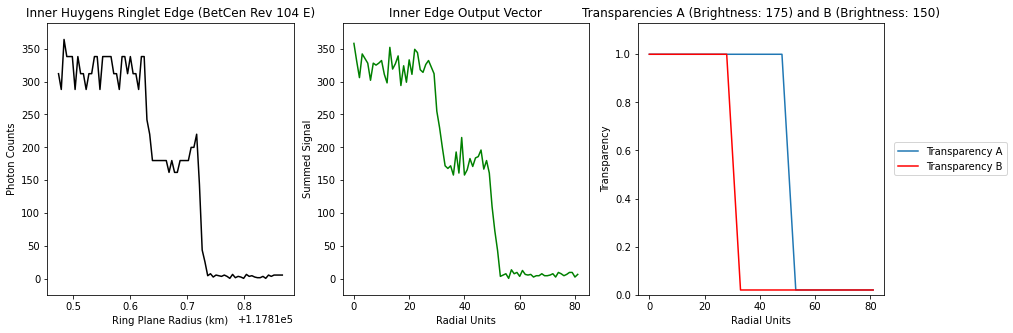

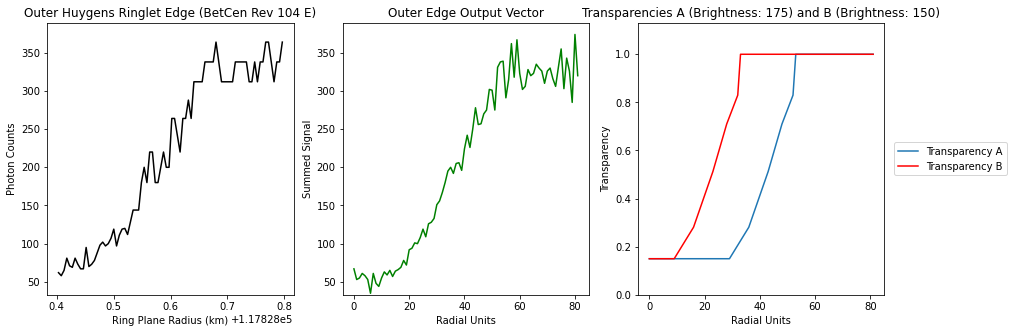

Radial Lag:   20
Inner Edge χ2: 4.951908
Outer Edge χ2: 3.176465


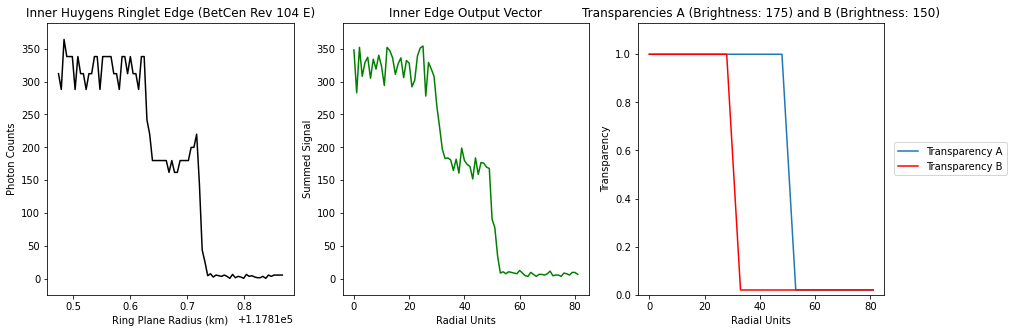

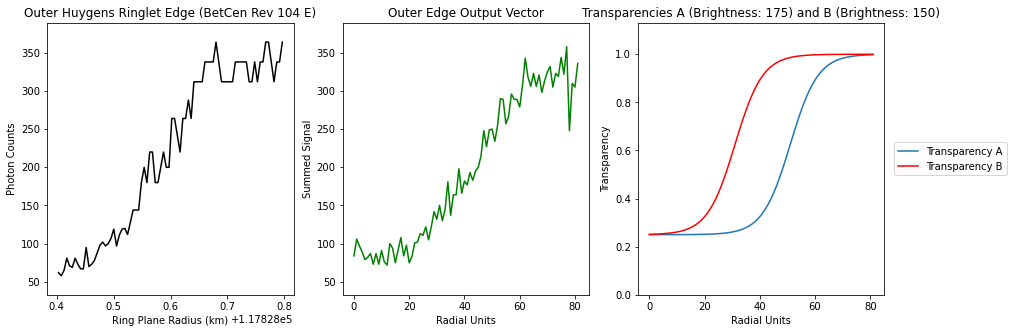

Radial Lag:   20
Inner Edge χ2: 4.943244
Outer Edge χ2: 5.911164


In [5]:
#Huygens Ringlet
#Originals below
starA104E_IHR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.00, 0, 2)
starB104E_IHR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.06, 0, 2)
starA104E_OHR = ModelTransparencyStep(175, -10, len(dataA104E.data[outerHuygensRingletEdge]), 0.18, 1, 22, 2)
starB104E_OHR = ModelTransparencyStep(150, 10, len(dataA104E.data[outerHuygensRingletEdge]), 0.30, 1, 22, 2)

#Identical steps
starA104E_IHR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.02, 4, 2)
starB104E_IHR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.02, 4, 2)
starA104E_OHR = ModelTransparencyStep(175, -10, len(dataA104E.data[outerHuygensRingletEdge]), 0.15, 1, 4, 2)
spike(starA104E_OHR, 5, 0.5, 6)
spike(starA104E_OHR, 0, 0.2, 7)
spike(starA104E_OHR, -5, 0.05, 7)
starB104E_OHR = ModelTransparencyStep(150, 10, len(dataA104E.data[outerHuygensRingletEdge]), 0.15, 1, 4, 2)
spike(starB104E_OHR, -15, 0.5, 6)
spike(starB104E_OHR, -20, 0.2, 7)
spike(starB104E_OHR, -25, 0.05, 7)
plotEdgesStepALT(dataA104E, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)", innerHuygensRingletEdge, starA104E_IHR, starB104E_IHR,
             "Outer Huygens Ringlet Edge (BetCen Rev 104 E)", outerHuygensRingletEdge, starA104E_OHR, starB104E_OHR)
print("Radial Lag:   %d" % abs(starA104E_IHR.radialLag - starB104E_IHR.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_IHR, starB104E_IHR))
print("Outer Edge χ2: %f" % chiSquared(dataA104E, outerHuygensRingletEdge, starA104E_OHR, starB104E_OHR))

starA104E_IHR = ModelTransparencyStep(175, -10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.02, 4, 2)
starB104E_IHR = ModelTransparencyStep(150, 10, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.02, 4, 2)
starA104E_OHR = ModelTransparencySigmoid(175, -10, len(dataA104E.data[outerHuygensRingletEdge]), 0.25, 1, 0.2)
starB104E_OHR = ModelTransparencySigmoid(150, 10, len(dataA104E.data[outerHuygensRingletEdge]), 0.25, 1, 0.2)
plotEdgesStepALT(dataA104E, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)", innerHuygensRingletEdge, starA104E_IHR, starB104E_IHR,
             "Outer Huygens Ringlet Edge (BetCen Rev 104 E)", outerHuygensRingletEdge, starA104E_OHR, starB104E_OHR)
print("Radial Lag:   %d" % abs(starA104E_IHR.radialLag - starB104E_IHR.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_IHR, starB104E_IHR))
print("Outer Edge χ2: %f" % chiSquared(dataA104E, outerHuygensRingletEdge, starA104E_OHR, starB104E_OHR))

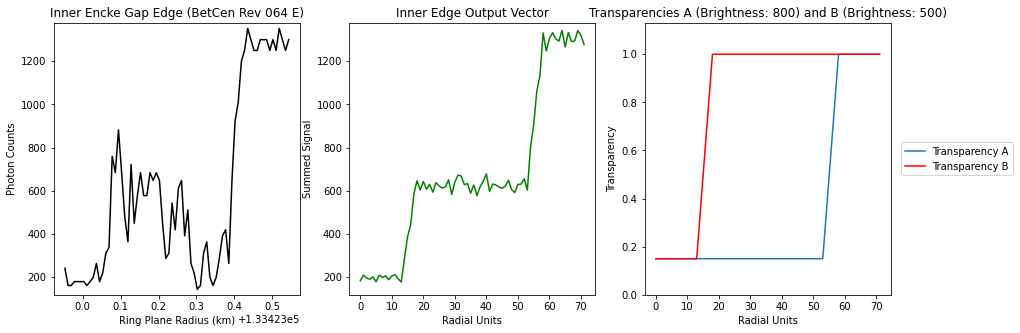

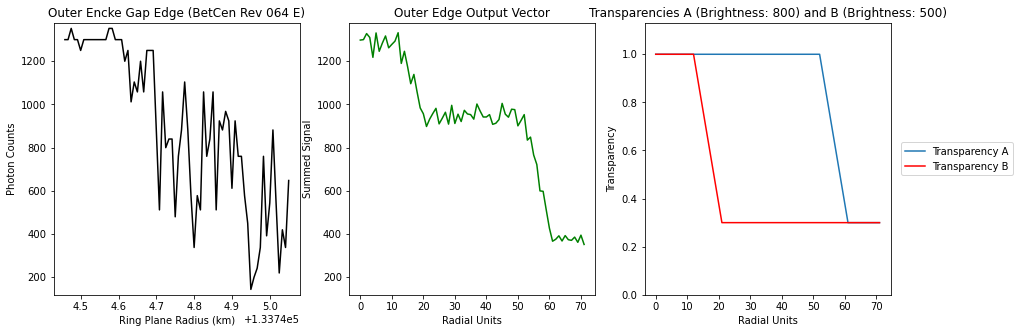

Radial Lag:   40
Inner Edge χ2: 66.876317
Outer Edge χ2: 52.511065


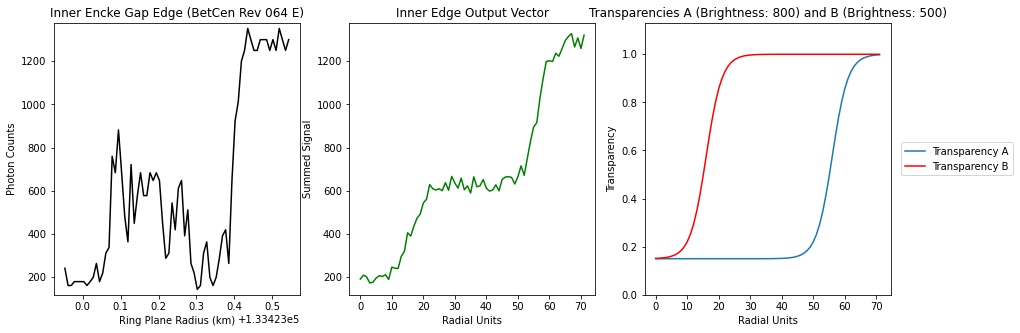

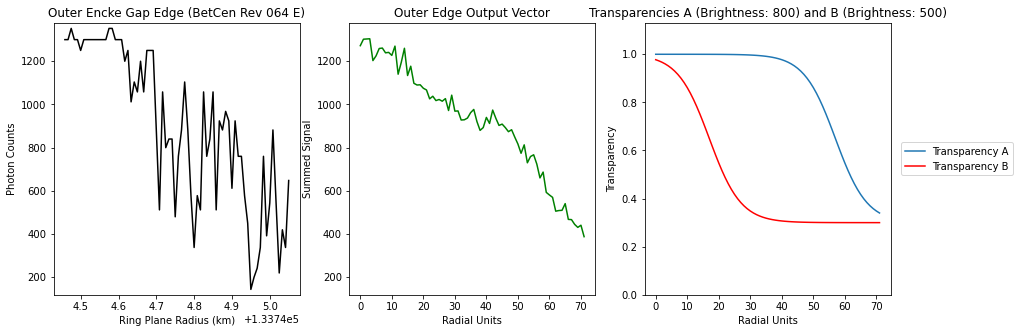

Radial Lag:   40
Inner Edge χ2: 78.494310
Outer Edge χ2: 50.986144


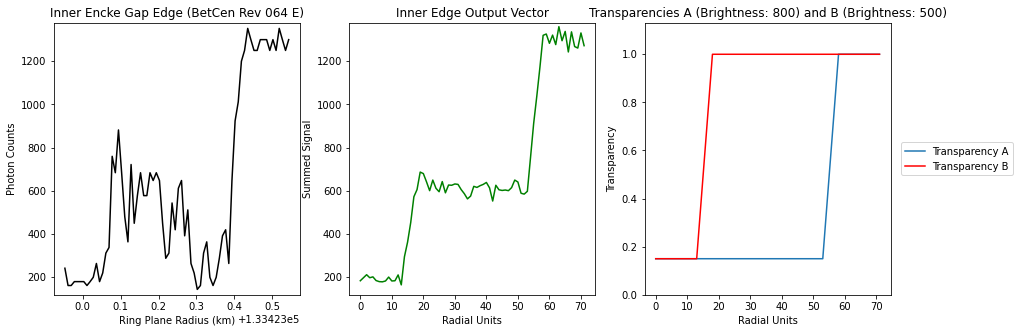

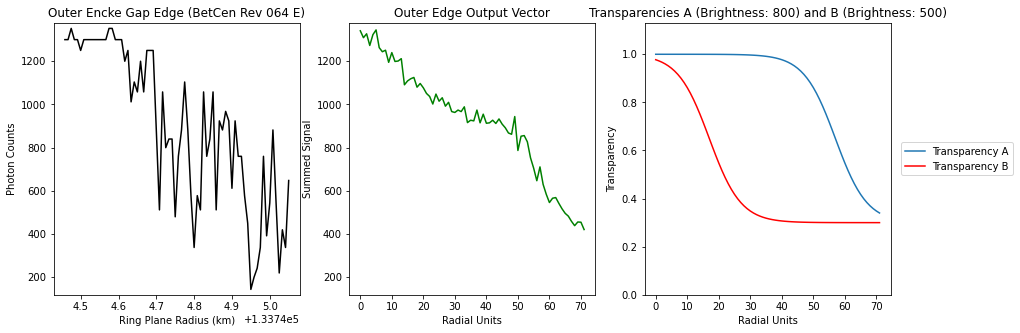

Radial Lag:   40
Inner Edge χ2: 66.906145
Outer Edge χ2: 50.942629


'\n#       ModelTransparencyFourier(brightness, radialLag, numPoints, periocityFactor,\n#                                function, scale, scalex, shift, shiftx, order, startPeriod, endPeriod)\nstarA064E_IEG = ModelTransparencySigmoid(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 0.4)\nstarB064E_IEG = ModelTransparencySigmoid(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 0.4)\nstarA064E_OEG = ModelTransparencyFourier(800, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.05, expression2, 0.4, 1, 0.4, 40 + 40, 6, -np.pi, np.pi)\nstarB064E_OEG = ModelTransparencyFourier(500, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.05, expression2, 0.4, 1, 0.4, 0 + 40, 6, -np.pi, np.pi)\n#starA064E_OEG = ModelTransparencyFourier(800, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.075, expression2, 0.1, 1, 0.75, -35, 4, -np.pi, np.pi)\n#starB064E_OEG = ModelTransparencyFourier(500, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.075, expression2, 0.1, 1, 0.75, -35, 4, -np.pi, np.pi

In [6]:
#Encke Gap
#Originals Below
starA064E_IEG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.165, 1, 4, 2)
starB064E_IEG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starA064E_OEG = ModelTransparencyStep(500, 15, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_OEG = ModelTransparencyStep(800, -19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.4, 8, 2)

starA064E_IEG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starB064E_IEG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starA064E_OEG = ModelTransparencyStep(800, -21, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_OEG = ModelTransparencyStep(500, 19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
plotEdgesStepALT(dataA064E, "Inner Encke Gap Edge (BetCen Rev 064 E)", innerEnckeGapEdge, starA064E_IEG, starB064E_IEG,
                "Outer Encke Gap Edge (BetCen Rev 064 E)", outerEnckeGapEdge, starA064E_OEG, starB064E_OEG)
print("Radial Lag:   %d" % abs(starA064E_IEG.radialLag - starB064E_IEG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_IEG, starB064E_IEG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_OEG, starB064E_OEG))

starA064E_IEG = ModelTransparencySigmoid(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 0.4)
starB064E_IEG = ModelTransparencySigmoid(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 0.4)
starA064E_OEG = ModelTransparencySigmoid(800, -21, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 0.2)
starB064E_OEG = ModelTransparencySigmoid(500, 19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 0.2)
plotEdgesStepALT(dataA064E, "Inner Encke Gap Edge (BetCen Rev 064 E)", innerEnckeGapEdge, starA064E_IEG, starB064E_IEG,
                "Outer Encke Gap Edge (BetCen Rev 064 E)", outerEnckeGapEdge, starA064E_OEG, starB064E_OEG)
print("Radial Lag:   %d" % abs(starA064E_IEG.radialLag - starB064E_IEG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_IEG, starB064E_IEG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_OEG, starB064E_OEG))

starA064E_IEG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starB064E_IEG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starA064E_OEG = ModelTransparencySigmoid(800, -21, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 0.2)
starB064E_OEG = ModelTransparencySigmoid(500, 19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 0.2)
plotEdgesStepALT(dataA064E, "Inner Encke Gap Edge (BetCen Rev 064 E)", innerEnckeGapEdge, starA064E_IEG, starB064E_IEG,
                "Outer Encke Gap Edge (BetCen Rev 064 E)", outerEnckeGapEdge, starA064E_OEG, starB064E_OEG)
print("Radial Lag:   %d" % abs(starA064E_IEG.radialLag - starB064E_IEG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_IEG, starB064E_IEG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_OEG, starB064E_OEG))

"""
#       ModelTransparencyFourier(brightness, radialLag, numPoints, periocityFactor,
#                                function, scale, scalex, shift, shiftx, order, startPeriod, endPeriod)
starA064E_IEG = ModelTransparencySigmoid(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 0.4)
starB064E_IEG = ModelTransparencySigmoid(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 0.4)
starA064E_OEG = ModelTransparencyFourier(800, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.05, expression2, 0.4, 1, 0.4, 40 + 40, 6, -np.pi, np.pi)
starB064E_OEG = ModelTransparencyFourier(500, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.05, expression2, 0.4, 1, 0.4, 0 + 40, 6, -np.pi, np.pi)
#starA064E_OEG = ModelTransparencyFourier(800, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.075, expression2, 0.1, 1, 0.75, -35, 4, -np.pi, np.pi)
#starB064E_OEG = ModelTransparencyFourier(500, 0, len(dataA064E.data[outerEnckeGapEdge]), -0.075, expression2, 0.1, 1, 0.75, -35, 4, -np.pi, np.pi)
plotEdgesStepALT(dataA064E, "Inner Encke Gap Edge (BetCen Rev 064 E)", innerEnckeGapEdge, starA064E_IEG, starB064E_IEG,
                "Outer Encke Gap Edge (BetCen Rev 064 E)", outerEnckeGapEdge, starA064E_OEG, starB064E_OEG)
print("Radial Lag:   %d" % abs(starA064E_IEG.radialLag - starB064E_IEG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_IEG, starB064E_IEG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_OEG, starB064E_OEG))
"""

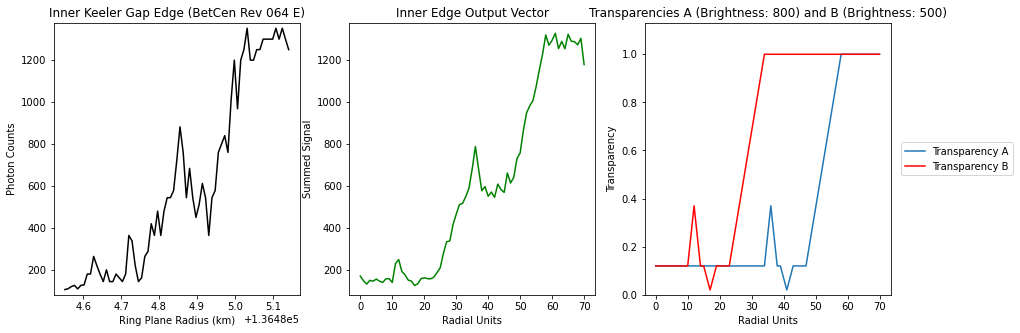

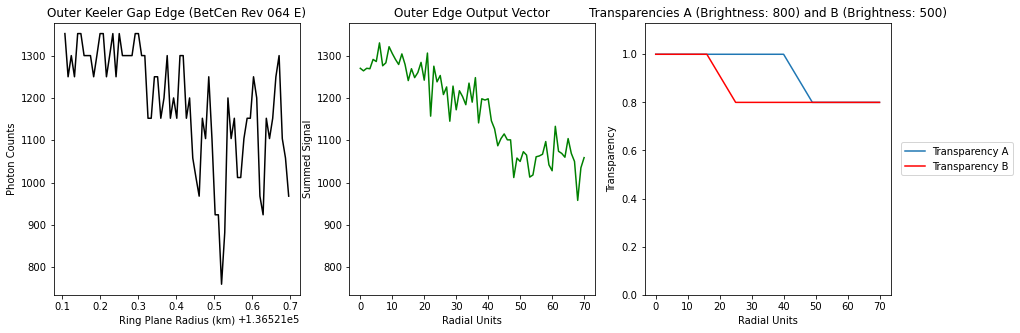

Radial Lag:   24
Inner Edge χ2: 10.896066
Outer Edge χ2: 9.847491


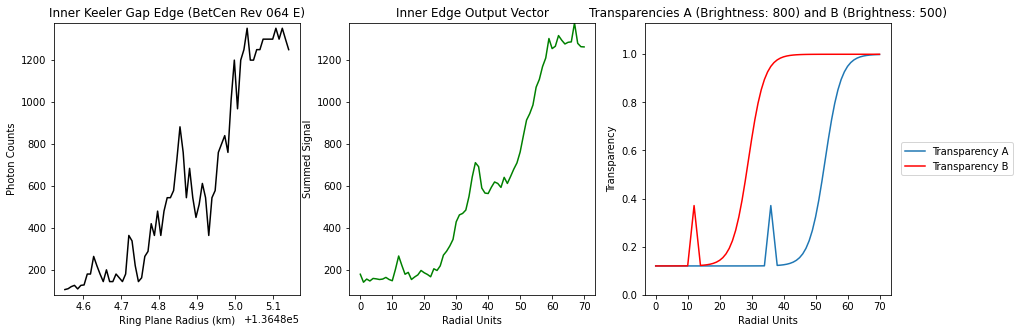

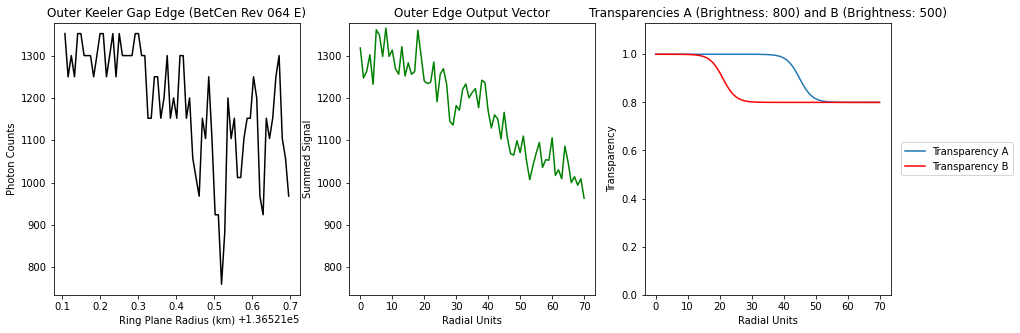

Radial Lag:   24
Inner Edge χ2: 12.905321
Outer Edge χ2: 9.935853


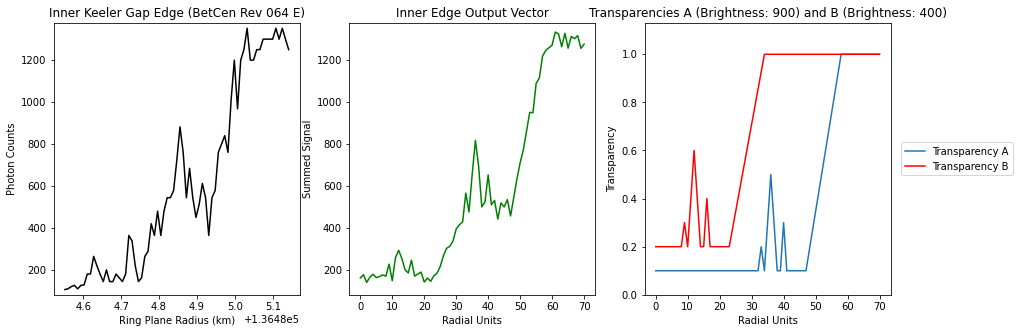

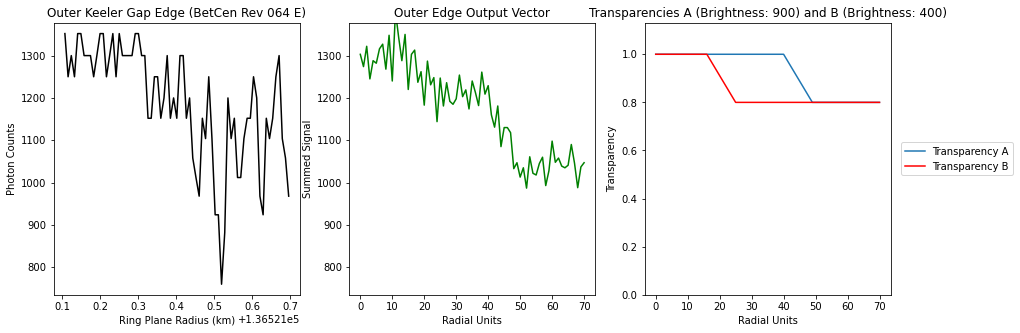

Radial Lag:   24
Inner Edge χ2: 15.198123
Outer Edge χ2: 9.892431


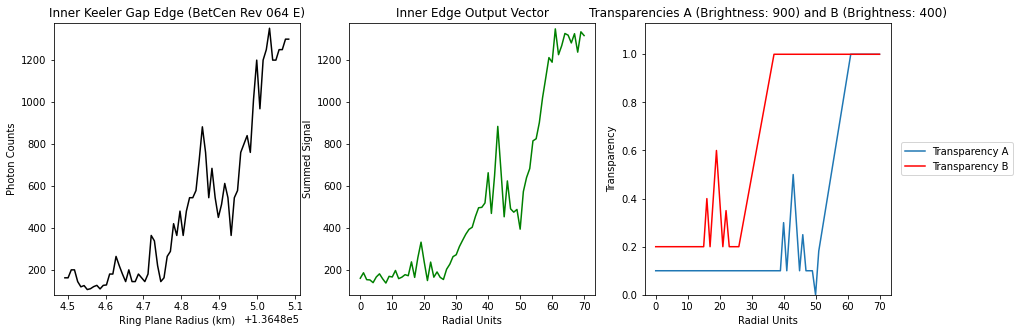

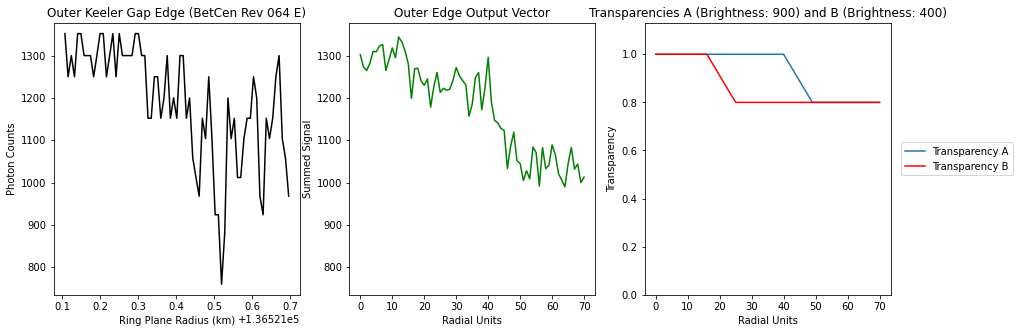

Radial Lag:   24
Inner Edge χ2: 24.253761
Outer Edge χ2: 9.915491


'\n#Probably bad below.\n#       ModelTransparencyFourier(brightness, radialLag, numPoints, periocityFactor,\n#                                function, scale, scalex, shift, shiftx, order, startPeriod, endPeriod)\nstarA064E_IKG = ModelTransparencySigmoid(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 0.4)\nstarB064E_IKG = ModelTransparencySigmoid(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 0.4)\nstarA064E_OKG = ModelTransparencyFourier(800, 0, len(dataA064E.data[outerKeelerGapEdge]), -0.4, expression2, 0.1, 1, 0.7, 0, 4, -np.pi, np.pi)\nstarB064E_OKG = ModelTransparencyFourier(500, 0, len(dataA064E.data[outerKeelerGapEdge]), -0.4, expression2, 0.1, 1, 0.7, 40, 4, -np.pi, np.pi)\nplotEdgesStepALT(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,\n                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)\nprint("Radial Lag:   %d" % abs(starA064E_IKG.radia

In [7]:
#Keeler Gap
#Originals Below
innerKeelerGapEdge = np.where(abs(dataA064E.radius - 136484.85) <= 0.3)
starA064E_IKG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
starB064E_IKG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
starA064E_OKG = ModelTransparencyStep(500, 10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 0, 2)
starB064E_OKG = ModelTransparencyStep(800, -14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.9, 0, 2)

starA064E_IKG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
spike(starA064E_IKG, 5, -0.1, 2)
spike(starA064E_IKG, 0, 0.25, 2)
#spike(starA064E_IKG, -8, -0.1, 4)
#spike(starA064E_IKG, 18, -0.2, 2)
starB064E_IKG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
spike(starB064E_IKG, -19, -0.1, 2)
spike(starB064E_IKG, -24, 0.25, 2)
#spike(starB064E_IKG, -32, -0.1, 4)
#spike(starB064E_IKG, -6, -0.2, 2)
starA064E_OKG = ModelTransparencyStep(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
#spike(starA064E_OKG, 29, -0.1, 2)
#spike(starA064E_OKG, 28, -0.2, 1)
#spike(starA064E_OKG, 30, 0.15, 2)
starB064E_OKG = ModelTransparencyStep(500, 14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
#spike(starB064E_OKG, 5, -0.1, 2)
#spike(starB064E_OKG, 4, -0.2, 1)
#spike(starB064E_OKG, 6, 0.15, 2)
plotEdgesStepALT(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))


starA064E_IKG = ModelTransparencySigmoid(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 0.4)
spike(starA064E_IKG, 0, 0.25, 2)
starB064E_IKG = ModelTransparencySigmoid(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 0.4)
spike(starB064E_IKG, -24, 0.25, 2)
starA064E_OKG = ModelTransparencySigmoid(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 0.5)
starB064E_OKG = ModelTransparencySigmoid(500, 14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 0.5)
plotEdgesStepALT(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))

starA064E_IKG = ModelTransparencyStep(900, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.1, 1, 10, 2)
spike(starA064E_IKG, -3, 0.1, 1)
spike(starA064E_IKG, 0, 0.4, 2)
spike(starA064E_IKG, 4, 0.2, 1)
#spike(starA064E_IKG, 8, -0.1, 1)
starB064E_IKG = ModelTransparencyStep(400, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.2, 1, 10, 2)
spike(starB064E_IKG, -27, 0.1, 1)
spike(starB064E_IKG, -24, 0.4, 2)
spike(starB064E_IKG, -20, 0.2, 1)
starA064E_OKG = ModelTransparencyStep(900, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
starB064E_OKG = ModelTransparencyStep(400, 14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
plotEdgesStepALT(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))

innerKeelerGapEdge = np.where(abs(dataA064E.radius - 136484.79) <= 0.3)

starA064E_IKG = ModelTransparencyStep(900, -21, len(dataA064E.data[innerKeelerGapEdge]), 0.1, 1, 10, 2)
spike(starA064E_IKG, 4, 0.2, 1)
spike(starA064E_IKG, 7, 0.4, 2)
spike(starA064E_IKG, 10, 0.15, 1)
spike(starA064E_IKG, 14, -0.1, 1)
starB064E_IKG = ModelTransparencyStep(400, 3, len(dataA064E.data[innerKeelerGapEdge]), 0.2, 1, 10, 2)
spike(starB064E_IKG, -20, 0.2, 1)
spike(starB064E_IKG, -17, 0.4, 2)
spike(starB064E_IKG, -14, 0.15, 1)
starA064E_OKG = ModelTransparencyStep(900, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
starB064E_OKG = ModelTransparencyStep(400, 14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
plotEdgesStepALT(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))

"""
#Probably bad below.
#       ModelTransparencyFourier(brightness, radialLag, numPoints, periocityFactor,
#                                function, scale, scalex, shift, shiftx, order, startPeriod, endPeriod)
starA064E_IKG = ModelTransparencySigmoid(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 0.4)
starB064E_IKG = ModelTransparencySigmoid(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 0.4)
starA064E_OKG = ModelTransparencyFourier(800, 0, len(dataA064E.data[outerKeelerGapEdge]), -0.4, expression2, 0.1, 1, 0.7, 0, 4, -np.pi, np.pi)
starB064E_OKG = ModelTransparencyFourier(500, 0, len(dataA064E.data[outerKeelerGapEdge]), -0.4, expression2, 0.1, 1, 0.7, 40, 4, -np.pi, np.pi)
plotEdgesStepALT(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))
"""

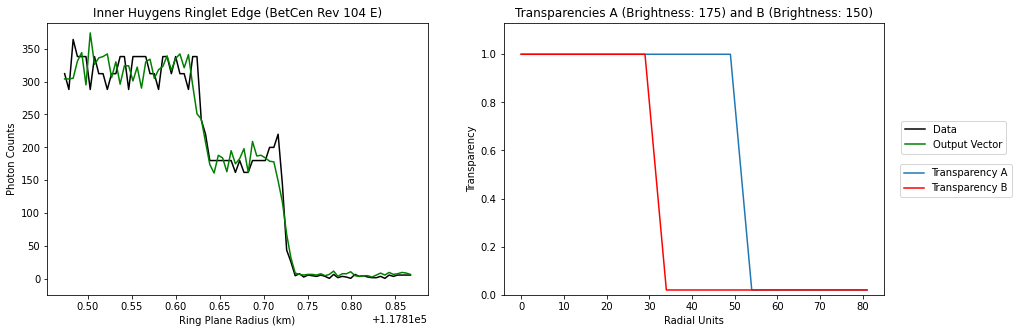

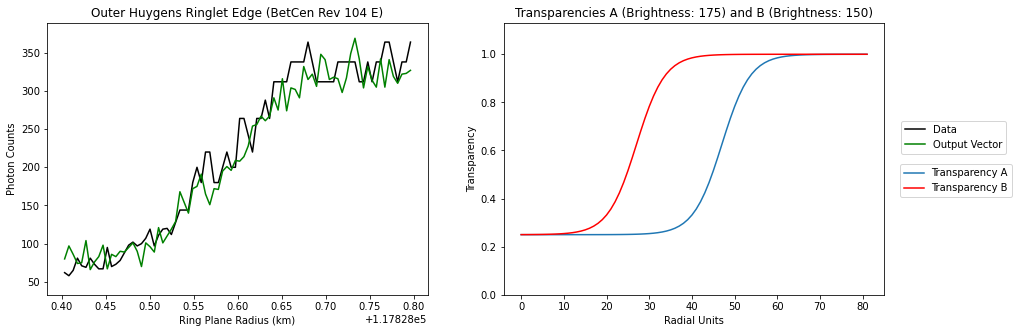

Radial Lag:   20
Inner Edge χ2: 3.381531
Outer Edge χ2: 2.861397


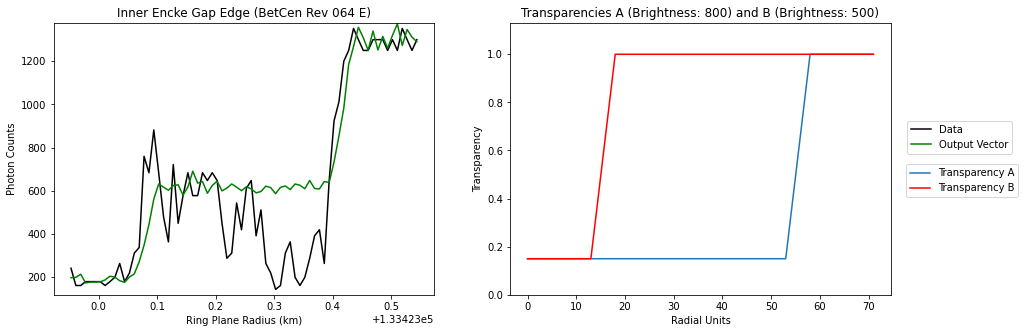

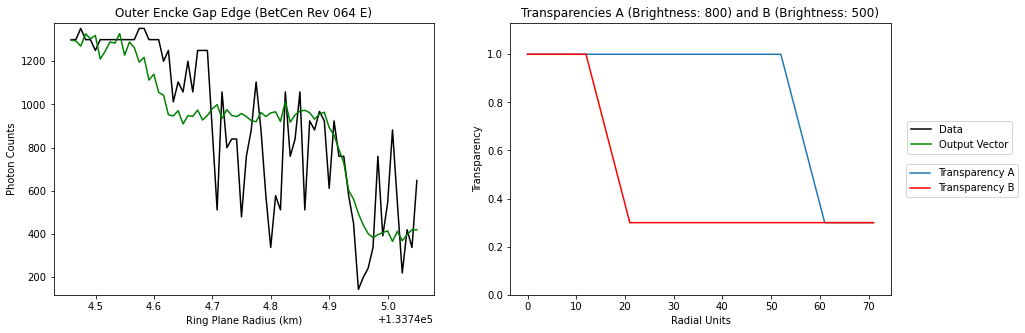

Radial Lag:   40
Inner Edge χ2: 66.850197
Outer Edge χ2: 52.537493


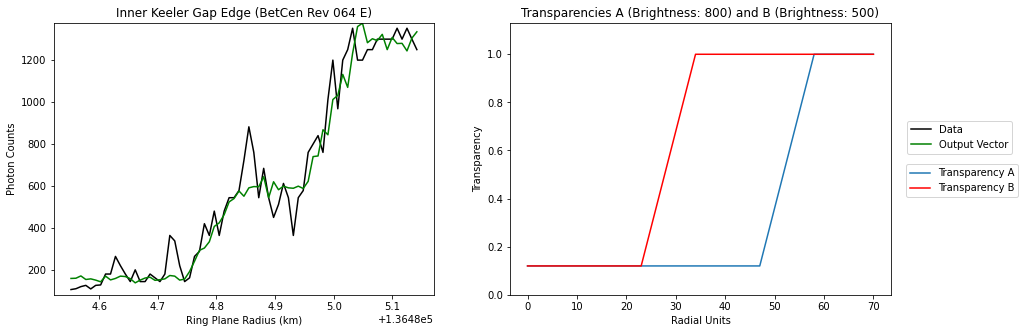

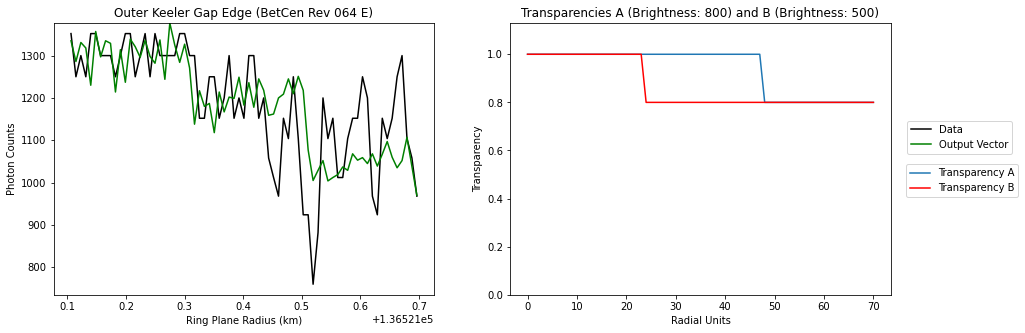

Radial Lag:   24
Inner Edge χ2: 13.667832
Outer Edge χ2: 10.416543


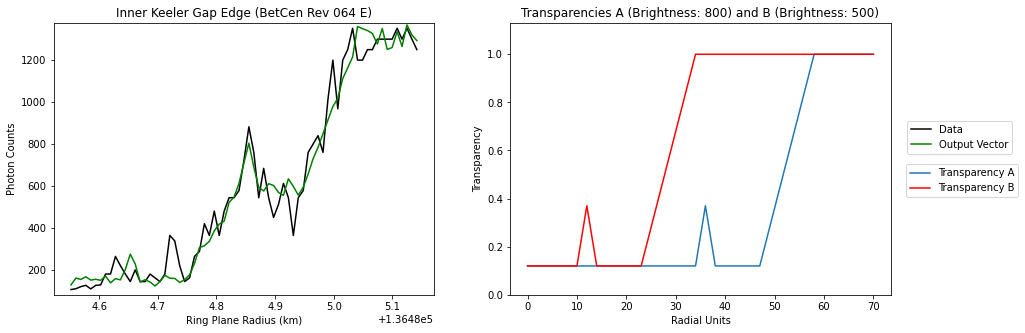

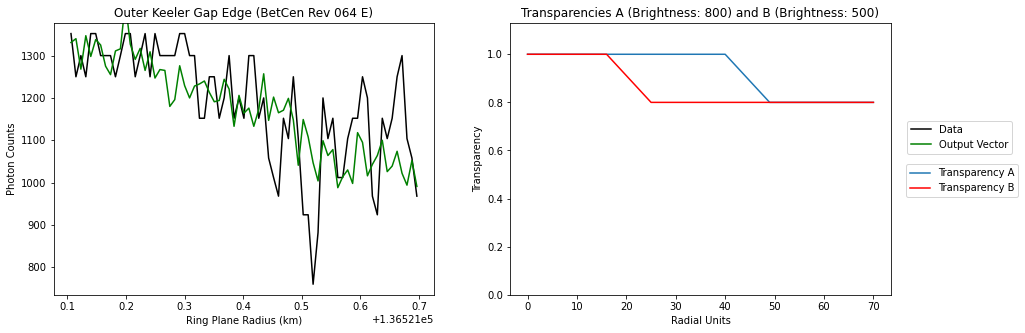

Radial Lag:   24
Inner Edge χ2: 11.367790
Outer Edge χ2: 9.824962


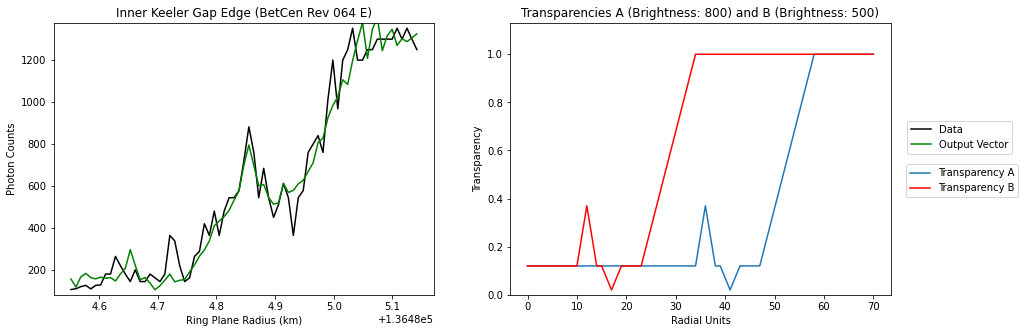

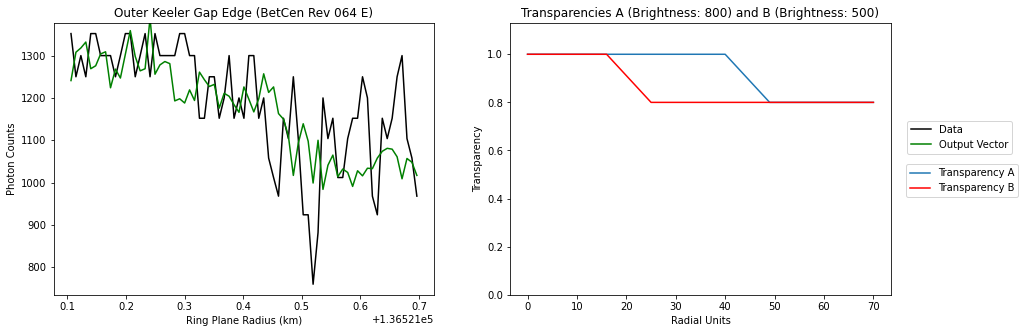

Radial Lag:   24
Inner Edge χ2: 10.905936
Outer Edge χ2: 9.872458


In [15]:
#Presentation Week 11

starA104E_IHR = ModelTransparencyStep(175, -11, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.02, 4, 2)
starB104E_IHR = ModelTransparencyStep(150, 9, len(dataA104E.data[innerHuygensRingletEdge]), 1, 0.02, 4, 2)
starA104E_OHR = ModelTransparencySigmoid(175, -6, len(dataA104E.data[outerHuygensRingletEdge]), 0.25, 1, 0.3)
starB104E_OHR = ModelTransparencySigmoid(150, 14, len(dataA104E.data[outerHuygensRingletEdge]), 0.25, 1, 0.3)
plotEdgesOverplot(dataA104E, "Inner Huygens Ringlet Edge (BetCen Rev 104 E)", innerHuygensRingletEdge, starA104E_IHR, starB104E_IHR,
             "Outer Huygens Ringlet Edge (BetCen Rev 104 E)", outerHuygensRingletEdge, starA104E_OHR, starB104E_OHR)
print("Radial Lag:   %d" % abs(starA104E_IHR.radialLag - starB104E_IHR.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA104E, innerHuygensRingletEdge, starA104E_IHR, starB104E_IHR))
print("Outer Edge χ2: %f" % chiSquared(dataA104E, outerHuygensRingletEdge, starA104E_OHR, starB104E_OHR))

starA064E_IEG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starB064E_IEG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
starA064E_OEG = ModelTransparencyStep(800, -21, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_OEG = ModelTransparencyStep(500, 19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
plotEdgesOverplot(dataA064E, "Inner Encke Gap Edge (BetCen Rev 064 E)", innerEnckeGapEdge, starA064E_IEG, starB064E_IEG,
                "Outer Encke Gap Edge (BetCen Rev 064 E)", outerEnckeGapEdge, starA064E_OEG, starB064E_OEG)
print("Radial Lag:   %d" % abs(starA064E_IEG.radialLag - starB064E_IEG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_IEG, starB064E_IEG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_OEG, starB064E_OEG))

starA064E_IKG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
#spike(starA064E_IKG, 5, -0.1, 2)
#spike(starA064E_IKG, 0, 0.25, 2)
starB064E_IKG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
#spike(starB064E_IKG, -19, -0.1, 2)
#spike(starB064E_IKG, -24, 0.25, 2)
starA064E_OKG = ModelTransparencyStep(800, -13, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 0, 2)
starB064E_OKG = ModelTransparencyStep(500, 11, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 0, 2)
plotEdgesOverplot(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))

starA064E_IKG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
#spike(starA064E_IKG, 5, -0.1, 2)
spike(starA064E_IKG, 0, 0.25, 2)
starB064E_IKG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
#spike(starB064E_IKG, -19, -0.1, 2)
spike(starB064E_IKG, -24, 0.25, 2)
starA064E_OKG = ModelTransparencyStep(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
starB064E_OKG = ModelTransparencyStep(500, 14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
plotEdgesOverplot(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))

starA064E_IKG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
spike(starA064E_IKG, 5, -0.1, 2)
spike(starA064E_IKG, 0, 0.25, 2)
starB064E_IKG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.12, 1, 10, 2)
spike(starB064E_IKG, -19, -0.1, 2)
spike(starB064E_IKG, -24, 0.25, 2)
starA064E_OKG = ModelTransparencyStep(800, -10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
starB064E_OKG = ModelTransparencyStep(500, 14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.8, 8, 2)
plotEdgesOverplot(dataA064E, "Inner Keeler Gap Edge (BetCen Rev 064 E)", innerKeelerGapEdge, starA064E_IKG, starB064E_IKG,
                "Outer Keeler Gap Edge (BetCen Rev 064 E)", outerKeelerGapEdge, starA064E_OKG, starB064E_OKG)
print("Radial Lag:   %d" % abs(starA064E_IKG.radialLag - starB064E_IKG.radialLag))
print("Inner Edge χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_IKG, starB064E_IKG))
print("Outer Edge χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_OKG, starB064E_OKG))

In [ ]:
#Presentation Week 10 (What not to do)
starA104E_HR = ModelTransparencyStep(175, -10, len(dataA104E.data[outerHuygensRingletEdge]), 0.18, 1, 22, 2)
starB104E_HR = ModelTransparencyStep(150, 10, len(dataA104E.data[outerHuygensRingletEdge]), 0.30, 1, 22, 2)
plotDataAndOutputStep(dataA104E, outerHuygensRingletEdge, "Outer Huygens Ringlet Edge Starstep (BetCen Rev 104 E)",
                      starA104E_HR, starB104E_HR)
print("χ2: %f" % chiSquared(dataA104E, outerHuygensRingletEdge, starA104E_HR, starB104E_HR))
print("")

starA064E_EG = ModelTransparencyStep(500, 20, len(dataA064E.data[innerEnckeGapEdge]), 0.165, 1, 4, 2)
starB064E_EG = ModelTransparencyStep(800, -20, len(dataA064E.data[innerEnckeGapEdge]), 0.150, 1, 4, 2)
spike(starB064E_EG, -19, 0.4, 2)
spike(starA064E_EG, -17, -0.45, 1)
spike(starB064E_EG, -14, -0.15, 1)
spike(starA064E_EG, -3, -0.45, 2)
spike(starA064E_EG, 11, -0.6, 5)
spike(starA064E_EG, 6, -0.6, 3)
spike(starA064E_EG, 16, -0.6, 2)
spike(starB064E_EG, 11, -0.15, 5)
spike(starB064E_EG, 6, -0.15, 3)
plotDataAndOutputStep(dataA064E, innerEnckeGapEdge, "Inner Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("Before Spike Implementation χ2: 66.633736")
print("χ2: %f" % chiSquared(dataA064E, innerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")

starA064E_EG = ModelTransparencyStep(500, 15, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.3, 8, 2)
starB064E_EG = ModelTransparencyStep(800, -19, len(dataA064E.data[outerEnckeGapEdge]), 1, 0.4, 8, 2)
spike(starA064E_EG, -10, 0.4, 4)
spike(starB064E_EG, -7, -0.5, 2)
spike(starB064E_EG, -1, -0.5, 2)
spike(starB064E_EG, 5, -0.7, 2)
spike(starA064E_EG, 27, 0.5, 1)
spike(starB064E_EG, 30, 0.5, 2)
spike(starA064E_EG, 24, -0.2, 2)
spike(starB064E_EG, 10, -0.2, 1)
spike(starA064E_EG, 14, -0.2, 1)
plotDataAndOutputStep(dataA064E, outerEnckeGapEdge, "Outer Encke Gap Edge (BetCen Rev 064 E)",
                      starA064E_EG, starB064E_EG)
print("Before Spike Implementation χ2: 46.005164")
print("χ2: %f" % chiSquared(dataA064E, outerEnckeGapEdge, starA064E_EG, starB064E_EG))
print("")

starA064E_KG = ModelTransparencyStep(500, 6, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
starB064E_KG = ModelTransparencyStep(800, -18, len(dataA064E.data[innerKeelerGapEdge]), 0.15, 1, 10, 2)
#spike(star, unitsFromCenter, verticalShiftOfSpikeCenter, radiusOfSpike)
spike(starA064E_KG, -16, 0.3, 2)
spike(starA064E_KG, -6, -0.2, 3)
spike(starB064E_KG, 0, 0.33, 2)
#spike(starB064E_KG, -25, -0.05, 6)
spike(starA064E_KG, 9, -0.3, 3)
spike(starA064E_KG, 5, -0.1, 1)
spike(starB064E_KG, 5, -0.1, 1)
plotDataAndOutputStep(dataA064E, innerKeelerGapEdge, "Inner Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("Before Spike Implementation χ2: 13.616686")
print("χ2: %f" % chiSquared(dataA064E, innerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")

starA064E_KG = ModelTransparencyStep(500, 10, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.7, 0, 2)
starB064E_KG = ModelTransparencyStep(800, -14, len(dataA064E.data[outerKeelerGapEdge]), 1, 0.9, 0, 2)
spike(starB064E_KG, 12, -0.4, 2)
spike(starA064E_KG, 5, -0.3, 2)
spike(starB064E_KG, 24, 0.11, 2)
spike(starA064E_KG, 17, 0.11, 2)
spike(starA064E_KG, 30, 0.3, 2)
plotDataAndOutputStep(dataA064E, outerKeelerGapEdge, "Outer Keeler Gap Edge (BetCen Rev 064 E)",
                      starA064E_KG, starB064E_KG)
print("Before Spike Implementation χ2: 9.380174")
print("χ2: %f" % chiSquared(dataA064E, outerKeelerGapEdge, starA064E_KG, starB064E_KG))
print("")


